In [1]:
#importando as bibliotecas que foram utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import pickle
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split, GridSearchCV, KFold, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns; sns.set()
from colorama import Fore, Back, Style

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
dados = pd.read_csv('C:/Users/Manoel/Documents/GitHub/Risco_Default/Input/df_criado_final.csv', sep = ',')

In [4]:
print(dados.shape)
dados.describe()

(50390, 23)


,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,14615.000000,9768.000000,50390.000000,50390.000000,21843.000000,12806.000000,0.0,0.0,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390.000000
mean,1.175573,4635.610641,3.503354,31.724529,2.104931,1.241605,NaN,NaN,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,57.498055
std,0.508951,24776.361024,2.132091,8.565117,0.898459,0.496176,NaN,NaN,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,1.118008
min,1.000000,0.009600,1.000000,18.000000,1.000000,1.000000,NaN,NaN,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,56.000000
25%,1.000000,28.173400,2.000000,26.000000,2.000000,1.000000,NaN,NaN,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,56.000000
50%,1.000000,186.004900,2.000000,30.000000,2.000000,1.000000,NaN,NaN,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,57.000000
75%,1.000000,1159.021800,4.000000,35.000000,2.000000,1.000000,NaN,NaN,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,58.000000
max,3.000000,516960.779100,11.000000,113.000000,18.000000,3.000000,NaN,NaN,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09,1.000000,1.0,2.399887e+10,1.000000,59.000000


In [5]:
dados.drop_duplicates(keep=False, inplace=True)
dados

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1.328587e+06,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1.424254e+06,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1.438519e+06,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1.426138e+06,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1.474504e+06,0,2020-01-01,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50385,NaN,NaN,N,4,26,S,N,2.0,NaN,N,...,1593.00,36020.75,14170.56,51784.31,0,1,1.686687e+10,0,2020-01-01,57
50386,NaN,NaN,N,4,26,S,N,2.0,NaN,N,...,1593.00,1214.50,154.24,2961.74,0,1,1.695679e+10,0,2020-01-01,57
50387,NaN,NaN,S,2,26,S,N,NaN,NaN,S,...,1593.00,194.32,26.86,1814.18,0,1,1.448218e+06,0,2020-01-01,57
50388,1.0,1149.8448,N,2,26,S,N,2.0,2.0,N,...,1593.00,1038.40,30.53,2661.93,0,1,1.510609e+06,0,2020-01-01,56


In [6]:
"""
verifica o percentual das colunas que são nulas ou tem nan.
"""
total = dados.isnull().sum().sort_values(ascending=False)
percentual = (dados.isnull().sum()/dados.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
Valor Conta Corrente,50390,100.000000
Valor Conta Poupanca,50390,100.000000
Renda Mensal Informal,40622,80.615201
Qtd Fonte Renda,37584,74.586227
Escolaridade,35775,70.996229
Quant Adiantamento Deposito,28547,56.652114
PAGO,0,0.000000
Valor Emprestimo Atualizado,0,0.000000
Genero,0,0.000000
Dependentes,0,0.000000


In [7]:
# criando uma lista com as colunas que possuem até 70% das linhas preenchidas.
colunas_a_manter = missing_data.index[missing_data['Percentual'] < 70].tolist()
colunas_a_manter

['Quant Adiantamento Deposito',
 'PAGO',
 'Valor Emprestimo Atualizado',
 'Genero',
 'Dependentes',
 'Estado Civil',
 'Idade',
 'Conta Poupanca',
 'Conta Salario',
 'ID',
 'Cheque Sem Fundo',
 'Conta Conjunta',
 'Data',
 'Controle',
 'Valor Emprestimo',
 'Multa',
 'Juros',
 'Estado']

In [8]:
dados = dados[colunas_a_manter]
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,ID,Cheque Sem Fundo,Conta Conjunta,Data,Controle,Valor Emprestimo,Multa,Juros,Estado
0,NaN,1,14282.55,1,S,2,36,S,N,1.328587e+06,N,N,2020-01-01,1,8174.32,263.25,5844.98,57
1,2.0,1,51035.18,1,N,2,39,S,N,1.424254e+06,S,N,2020-01-01,1,41775.63,1607.29,7652.26,59
2,NaN,1,867116.29,0,S,2,26,S,N,1.438519e+06,S,N,2020-01-01,1,522940.27,24860.40,319315.62,56
3,NaN,1,26032.84,1,N,8,23,N,N,1.426138e+06,N,N,2020-01-01,1,1593.00,21472.36,2967.48,56
4,NaN,1,2144.76,0,S,2,33,S,N,1.474504e+06,N,N,2020-01-01,1,2078.97,19.44,46.35,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50385,2.0,0,51784.31,0,N,4,26,S,N,1.686687e+10,N,N,2020-01-01,1,1593.00,36020.75,14170.56,57
50386,2.0,0,2961.74,0,N,4,26,S,N,1.695679e+10,N,N,2020-01-01,1,1593.00,1214.50,154.24,57
50387,NaN,0,1814.18,0,S,2,26,S,N,1.448218e+06,S,N,2020-01-01,1,1593.00,194.32,26.86,57
50388,2.0,0,2661.93,0,N,2,26,S,N,1.510609e+06,N,N,2020-01-01,1,1593.00,1038.40,30.53,56


In [9]:
dados['Quant Adiantamento Deposito'].value_counts()

2.0     17429
1.0      1960
3.0      1689
4.0       456
5.0       126
8.0        55
6.0        46
7.0        28
18.0       19
9.0        12
12.0        9
10.0        6
13.0        3
16.0        3
11.0        2
Name: Quant Adiantamento Deposito, dtype: int64

Quant Adiantamento Deposito teve um pouco mais de 50% das linhas com nan's. Por curiosidade, resolvi verificar melhor essa coluna com value_counts e percebi que o 0 não apareceu. Sendo assim, resolvi substituir os Nan's por zero nessa coluna.

In [10]:
# como 0 não aparece nos valores, acho que substituir os nan por 0 é bem razoável.
dados['Quant Adiantamento Deposito'].update(dados['Quant Adiantamento Deposito'].fillna(0))

In [11]:
dados['Quant Adiantamento Deposito'] = dados['Quant Adiantamento Deposito'].astype(int)

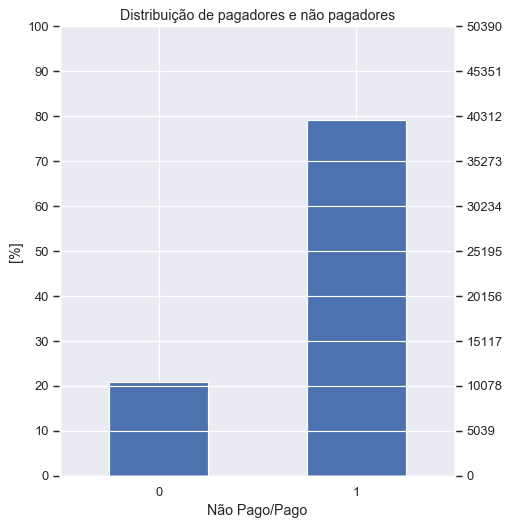

In [12]:
plt.figure(figsize=(6,7), dpi = 85)
plt.title('Distribuição de pagadores e não pagadores')
plt.xlabel('Não Pago/Pago')
plt.ylabel('[%]')

ax = (dados.PAGO.value_counts()/len(dados)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(dados)/100)
plt.show()

Analisando nosso dataset, a variável alvo, um pouco mais de 20% dos clientes não pagaram o empréstimo, enquanto quase 80% pagaram. Primeira coisa que chama atenção é que a variável alvo é desbalanceada.

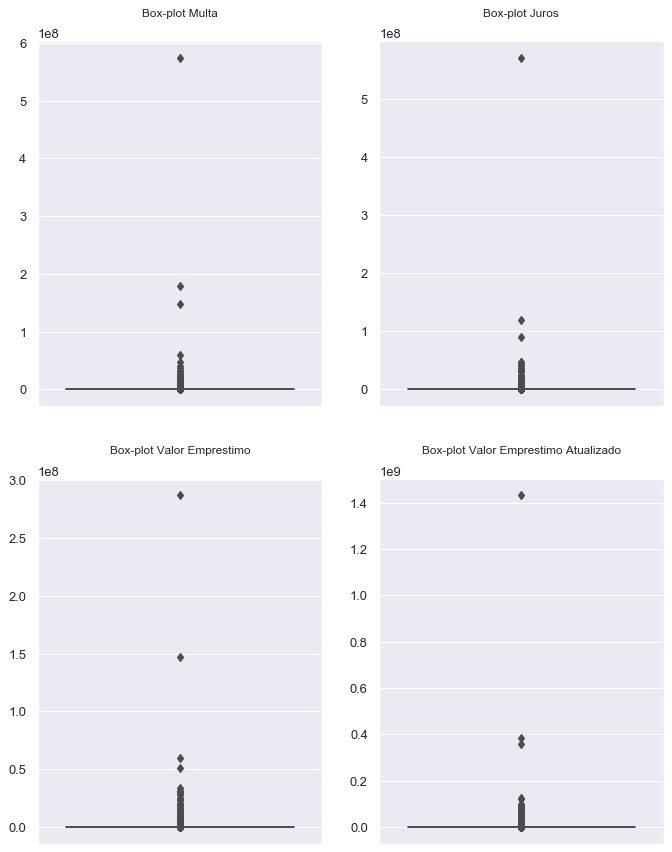

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(9.5, 12.5), dpi = 85)

g1 = sns.boxplot(data=dados['Multa'], ax=ax[0,0])
g1.set_title('Box-plot Multa', fontsize = 10, y =1.05)
g1.set(xticklabels=[]) 
g1.set(xlabel=None)
g1.tick_params(bottom=False)

g2 = sns.boxplot(data=dados['Juros'], ax=ax[0,1])
g2.set_title('Box-plot Juros', fontsize = 10, y =1.05)
g2.set(xticklabels=[]) 
g2.set(xlabel=None)
g2.tick_params(bottom=False)

g3 = sns.boxplot(data=dados['Valor Emprestimo'], ax=ax[1,0])
g3.set_title('Box-plot Valor Emprestimo', fontsize = 10, y =1.05)
g3.set(xticklabels=[]) 
g3.set(xlabel=None)
g3.tick_params(bottom=False)

g4 = sns.boxplot(data=dados['Valor Emprestimo Atualizado'], ax=ax[1,1])
g4.set_title('Box-plot Valor Emprestimo Atualizado', fontsize = 10, y =1.05)
g4.set(xticklabels=[]) 
g4.set(xlabel=None)
g4.tick_params(bottom=False)

plt.show()

Ao fazer o box-plot da multa, juros, valor do empréstimo e valor do empréstimo atualizado, percebi a existência de muitos outliers, tão discrepantes que o box ficou como uma linha reta.

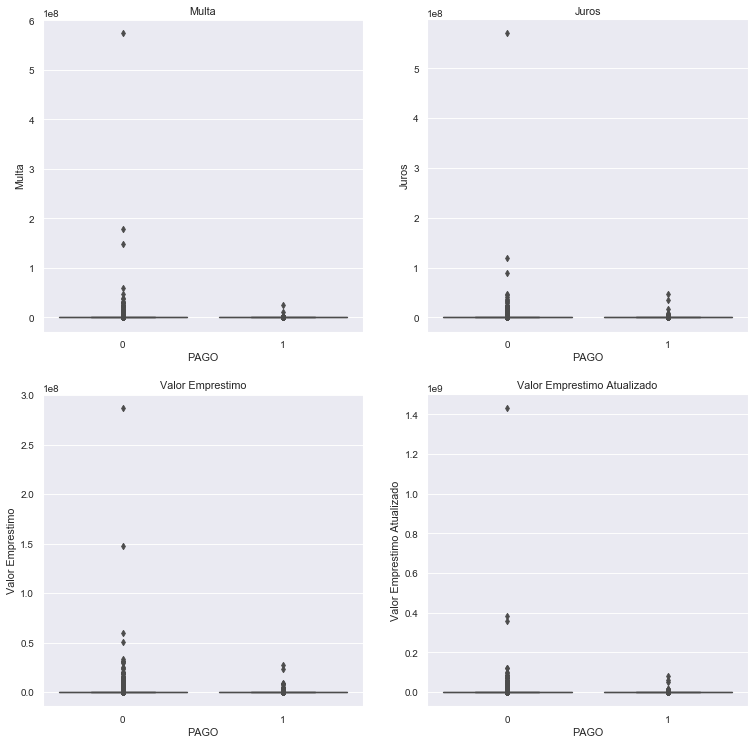

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14), dpi=65)

#fig.suptitle('Box-plot')

g1 = sns.boxplot(ax=axes[0, 0], x="PAGO", y="Multa", data=dados).set_title('Multa')

g2 = sns.boxplot(ax=axes[0, 1], x="PAGO", y="Juros", data=dados).set_title('Juros')
g3 = sns.boxplot(ax=axes[1, 0], x="PAGO", y="Valor Emprestimo", data=dados).set_title('Valor Emprestimo')
g4 = sns.boxplot(ax=axes[1, 1], x="PAGO", y="Valor Emprestimo Atualizado", data=dados).set_title('Valor Emprestimo Atualizado')

plt.show()

Quando fazendo o box-plot entre os clientes que pagaram ou não para as variáveis multa, juros, valor do empréstimo e valor do empréstimo atualizado percebemos que ambos possuem outliers persistentes, contudo quem não pagou possui os mais discrepantes.

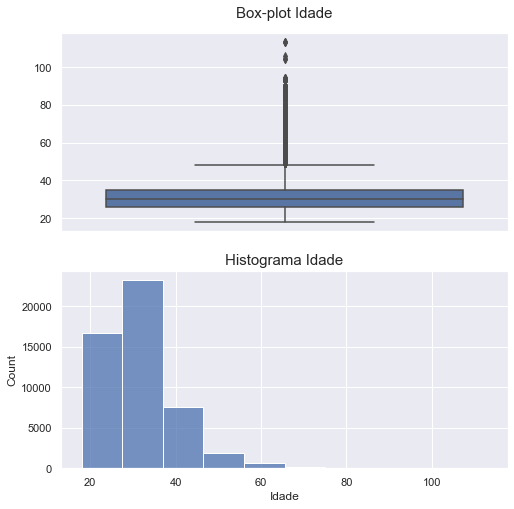

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

g = sns.boxplot(data=dados['Idade'], ax=ax[0])
g.set_title('Box-plot Idade', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=dados, x="Idade", bins=10, ax=ax[1])
hist.set_title('Histograma Idade', fontsize = 15)

plt.show()

Idade também possui alguns outliers. Além disso, boa parte dos clientes possuem idade inferior a 40 ano de idade.

In [16]:
# calculando a proporção do juros, multa e empréstimo em relação ao valor do empréstimo atualizado. É de se esperar que esses
# valores sejam menores que 1. Depois de calcular isso, dropo os valores que não respeitarem essa proporção.
dados['Emp/Atualizado'] = dados['Valor Emprestimo']/dados['Valor Emprestimo Atualizado']
dados['Multa/Atualizado'] = dados['Multa']/dados['Valor Emprestimo Atualizado']
dados['Juros/Atualizado'] = dados['Juros']/dados['Valor Emprestimo Atualizado']

In [17]:
dados = dados[(dados['Emp/Atualizado'] <= 1) & (dados['Multa/Atualizado'] <= 1) & (dados['Juros/Atualizado'] <= 1) & (dados['Multa'] > 1) & (dados['Juros'] > 1)]
#dados.reset_index(drop=True, inplace=True)

In [18]:
# pelo fato de possuir muitos outliers, optei por dropar aqueles que ficaram acima do percentil 95.
dados = dados[(dados['Valor Emprestimo'] <= dados['Valor Emprestimo'].quantile(0.95)) & (dados['Multa'] <= dados['Multa'].quantile(0.95)) & (dados['Juros'] <= dados['Juros'].quantile(0.95))]
dados.reset_index(drop=True, inplace=True)

Resumindo o que foi feito até aqui:
- <p style='text-align: justify;'>Calculado a proporção das seguintes variáveis em relação ao valor do empréstimo atualizado: multa, juros e valor empréstimo. Todas as linhas que alguma proporção ficou acima de 1 foram excluídas - não faz sentido o valor da multa, juros ou empréstimo serem maiores que o valor do emprestimo atualizado.
- <p style='text-align: justify;'>Multa e Juros que possuem valores menores que 1 também foram dropados - fiz essa exclusão porque mais a frente vou usar o log nessas variáveis e nesse intervalo, entre 0 e 1, o log seia negativo. Além de que não faz muito sentido multa e juros com um valor tão reduzido.
- <p style='text-align: justify;'>As seguintes variáveis multa, juros, valor do empréstimo e valor do empréstimo atualizado tiveram os valores acima do percentil 95 excluídos devido aos outliers presentes.

In [19]:
dados.describe()

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Estado Civil,Idade,ID,Controle,Valor Emprestimo,Multa,Juros,Estado,Emp/Atualizado,Multa/Atualizado,Juros/Atualizado
count,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000,4.499400e+04,44994.0,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000
mean,0.869271,0.832644,11530.554872,0.498666,3.500533,31.454349,3.104460e+09,1.0,5166.427790,2829.866838,3534.260245,57.498533,0.607275,0.193216,0.199510
std,1.146301,0.373297,16171.631690,0.500004,2.144671,8.151248,6.752815e+09,0.0,7104.615138,6255.799454,6898.147651,1.119158,0.268372,0.207581,0.140383
min,0.000000,0.000000,1596.490000,0.000000,1.000000,18.000000,1.168846e+06,1.0,1431.000000,1.010000,1.050000,56.000000,0.017227,0.000505,0.000657
25%,0.000000,1.000000,2690.160000,0.000000,2.000000,26.000000,1.379942e+06,1.0,1593.000000,116.550000,236.940000,56.000000,0.413075,0.020791,0.072748
50%,0.000000,1.000000,4801.740000,0.000000,2.000000,30.000000,1.425834e+06,1.0,1997.190000,477.710000,888.315000,57.000000,0.657824,0.112629,0.183693
75%,2.000000,1.000000,12072.595000,1.000000,4.000000,35.000000,1.511490e+06,1.0,5171.437500,2011.247500,3233.682500,59.000000,0.836055,0.332124,0.312332
max,18.000000,1.000000,125874.730000,1.000000,11.000000,113.000000,2.399887e+10,1.0,48147.460000,49416.000000,74568.640000,59.000000,0.997974,0.950137,0.914431


In [20]:
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,ID,...,Conta Conjunta,Data,Controle,Valor Emprestimo,Multa,Juros,Estado,Emp/Atualizado,Multa/Atualizado,Juros/Atualizado
0,0,1,14282.55,1,S,2,36,S,N,1.328587e+06,...,N,2020-01-01,1,8174.32,263.25,5844.98,57,0.572329,0.018432,0.409239
1,2,1,51035.18,1,N,2,39,S,N,1.424254e+06,...,N,2020-01-01,1,41775.63,1607.29,7652.26,59,0.818565,0.031494,0.149941
2,0,1,26032.84,1,N,8,23,N,N,1.426138e+06,...,N,2020-01-01,1,1593.00,21472.36,2967.48,56,0.061192,0.824818,0.113990
3,0,1,2144.76,0,S,2,33,S,N,1.474504e+06,...,N,2020-01-01,1,2078.97,19.44,46.35,59,0.969325,0.009064,0.021611
4,2,1,3469.92,0,N,2,40,S,N,1.341838e+06,...,N,2020-01-01,1,1593.00,1037.44,839.48,58,0.459088,0.298981,0.241931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,2,0,51784.31,0,N,4,26,S,N,1.686687e+10,...,N,2020-01-01,1,1593.00,36020.75,14170.56,57,0.030762,0.695592,0.273646
44990,2,0,2961.74,0,N,4,26,S,N,1.695679e+10,...,N,2020-01-01,1,1593.00,1214.50,154.24,57,0.537860,0.410063,0.052077
44991,0,0,1814.18,0,S,2,26,S,N,1.448218e+06,...,N,2020-01-01,1,1593.00,194.32,26.86,57,0.878083,0.107112,0.014806
44992,2,0,2661.93,0,N,2,26,S,N,1.510609e+06,...,N,2020-01-01,1,1593.00,1038.40,30.53,56,0.598438,0.390093,0.011469


In [21]:
def reescrevendo_estado(dataframe_coluna):
    """
    reescreve os estados trocando o número pela sigla de cada um.
    """
    
    if dataframe_coluna == 56:
        return 'SP'
    elif dataframe_coluna == 57:
        return 'MG'
    elif dataframe_coluna == 58:
        return 'RJ'
    else:
        return 'ES'

In [22]:
def reescrevendo_estado_civil(dataframe_coluna):
    """
    reescreve o estado civil trocando o número pelo estado civil.
    """
    
    if dataframe_coluna == 2:
        return 'Solteiro(a)'
    elif dataframe_coluna == 8:
        return 'Casado(a) com comunhão de bens'
    elif dataframe_coluna == 4:
        return 'Casado(a) com comunhão parcial de bens'
    elif dataframe_coluna == 3:
        return 'Casado(a) com separação de bens'
    elif dataframe_coluna == 1:
        return 'Divorciado'
    elif dataframe_coluna == 11:
        return 'Separad(a) Judicialmente'
    elif dataframe_coluna == 7:
        return 'Viúvo(a)'
    elif dataframe_coluna == 9:
        return 'Outros'

In [23]:
dados['Estado'] = dados['Estado'].apply(reescrevendo_estado)
dados['Estado Civil'] = dados['Estado Civil'].apply(reescrevendo_estado_civil)

In [24]:
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,ID,...,Conta Conjunta,Data,Controle,Valor Emprestimo,Multa,Juros,Estado,Emp/Atualizado,Multa/Atualizado,Juros/Atualizado
0,0,1,14282.55,1,S,Solteiro(a),36,S,N,1.328587e+06,...,N,2020-01-01,1,8174.32,263.25,5844.98,MG,0.572329,0.018432,0.409239
1,2,1,51035.18,1,N,Solteiro(a),39,S,N,1.424254e+06,...,N,2020-01-01,1,41775.63,1607.29,7652.26,ES,0.818565,0.031494,0.149941
2,0,1,26032.84,1,N,Casado(a) com comunhão de bens,23,N,N,1.426138e+06,...,N,2020-01-01,1,1593.00,21472.36,2967.48,SP,0.061192,0.824818,0.113990
3,0,1,2144.76,0,S,Solteiro(a),33,S,N,1.474504e+06,...,N,2020-01-01,1,2078.97,19.44,46.35,ES,0.969325,0.009064,0.021611
4,2,1,3469.92,0,N,Solteiro(a),40,S,N,1.341838e+06,...,N,2020-01-01,1,1593.00,1037.44,839.48,RJ,0.459088,0.298981,0.241931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,2,0,51784.31,0,N,Casado(a) com comunhão parcial de bens,26,S,N,1.686687e+10,...,N,2020-01-01,1,1593.00,36020.75,14170.56,MG,0.030762,0.695592,0.273646
44990,2,0,2961.74,0,N,Casado(a) com comunhão parcial de bens,26,S,N,1.695679e+10,...,N,2020-01-01,1,1593.00,1214.50,154.24,MG,0.537860,0.410063,0.052077
44991,0,0,1814.18,0,S,Solteiro(a),26,S,N,1.448218e+06,...,N,2020-01-01,1,1593.00,194.32,26.86,MG,0.878083,0.107112,0.014806
44992,2,0,2661.93,0,N,Solteiro(a),26,S,N,1.510609e+06,...,N,2020-01-01,1,1593.00,1038.40,30.53,SP,0.598438,0.390093,0.011469


In [25]:
dados.keys()

Index(['Quant Adiantamento Deposito', 'PAGO', 'Valor Emprestimo Atualizado',
       'Genero', 'Dependentes', 'Estado Civil', 'Idade', 'Conta Poupanca',
       'Conta Salario', 'ID', 'Cheque Sem Fundo', 'Conta Conjunta', 'Data',
       'Controle', 'Valor Emprestimo', 'Multa', 'Juros', 'Estado',
       'Emp/Atualizado', 'Multa/Atualizado', 'Juros/Atualizado'],
      dtype='object')

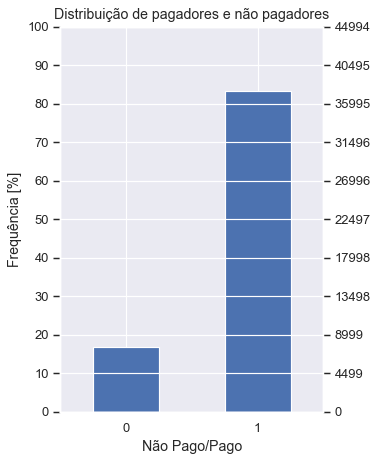

In [26]:
plt.figure(figsize=(4,6), dpi = 85)
plt.title('Distribuição de pagadores e não pagadores')
plt.xlabel('Não Pago/Pago')
plt.ylabel('Frequência [%]')

ax = (dados.PAGO.value_counts()/len(dados)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(dados)/100)
plt.show()

Após a transformação dos dados, nosso dataset ficou mais desequilibrado ainda. Antes dos drops, um pouco mais de 20% dos clientes praticavam default, após os drops das linhas, essa proporção ficou menor que 20%. A seguir me atento a outras variáveis e faço visualizações para facilitar a compreensão.

In [27]:
dados['Data'].value_counts()

2020-01-01    44994
Name: Data, dtype: int64

In [28]:
dados['Conta Poupanca'].value_counts()

S    38114
N     6880
Name: Conta Poupanca, dtype: int64

In [29]:
dados['Conta Salario'].value_counts()

N    44131
S      863
Name: Conta Salario, dtype: int64

In [30]:
dados['Conta Conjunta'].value_counts()

N    43129
S     1865
Name: Conta Conjunta, dtype: int64

In [31]:
dados['Cheque Sem Fundo'].value_counts()

N    34938
S    10056
Name: Cheque Sem Fundo, dtype: int64

In [32]:
dados['Controle'].value_counts()

1    44994
Name: Controle, dtype: int64

In [33]:
dados['Estado Civil'].value_counts()

Solteiro(a)                               24896
Casado(a) com comunhão parcial de bens    11505
Casado(a) com comunhão de bens             7066
Casado(a) com separação de bens            1353
Divorciado                                   64
Separad(a) Judicialmente                     57
Viúvo(a)                                     32
Outros                                       21
Name: Estado Civil, dtype: int64

In [34]:
dados['Estado'].value_counts()

MG    11312
ES    11285
SP    11268
RJ    11129
Name: Estado, dtype: int64

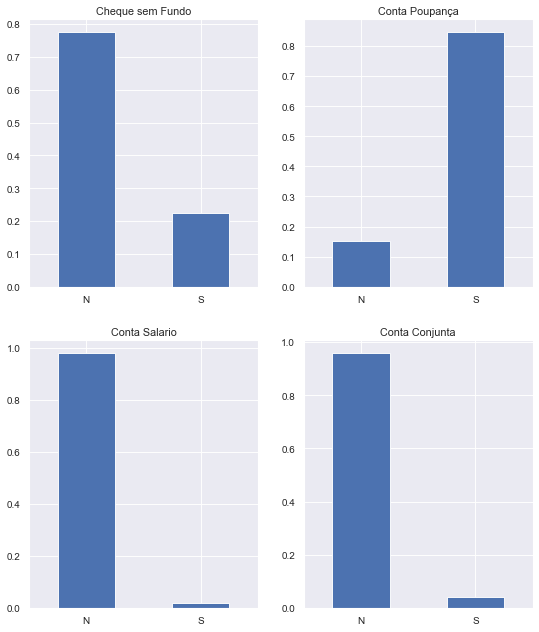

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 12), dpi=65)

#fig.suptitle('Box-plot')

#ax = (dados['Cheque Sem Fundo'].value_counts()/len(dados)*100).sort_index().plot(kind="bar", rot=0)
g1 = (dados['Cheque Sem Fundo'].value_counts()/len(dados)).sort_index().plot(ax=axes[0, 0], kind="bar", rot=0).set_title('Cheque sem Fundo')
g2 = (dados['Conta Poupanca'].value_counts()/len(dados)).sort_index().plot(ax=axes[0, 1], kind="bar", rot=0).set_title('Conta Poupança')
g3 = (dados['Conta Salario'].value_counts()/len(dados)).sort_index().plot(ax=axes[1, 0], kind="bar", rot=0).set_title('Conta Salario')
g4 = (dados['Conta Conjunta'].value_counts()/len(dados)).sort_index().plot(ax=axes[1, 1], kind="bar", rot=0).set_title('Conta Conjunta')


plt.show()

- Conta Salário e Conjunta majoritariamente é N. Poucos clientes possuem esse tipo de conta.
- Um pouco mais de 20% dos clientes passaram cheque sem fundos.
- Mais de 80% dos clientes possuem conta poupança.

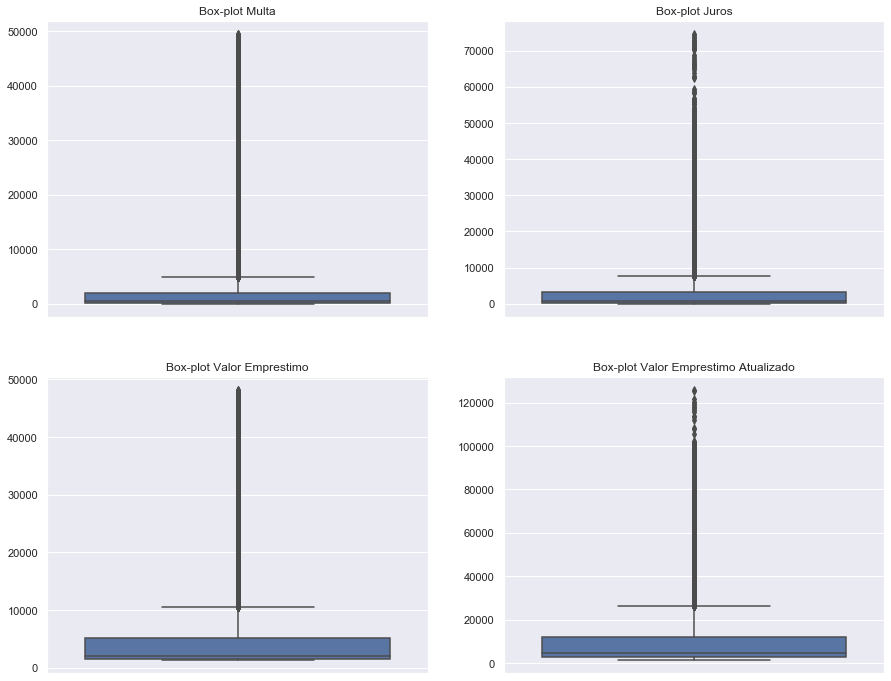

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

g1 = sns.boxplot(data=dados['Multa'], ax=ax[0,0])
g1.set_title('Box-plot Multa')
g1.set(xticklabels=[]) 
g1.set(xlabel=None)
g1.tick_params(bottom=False)

g2 = sns.boxplot(data=dados['Juros'], ax=ax[0,1])
g2.set_title('Box-plot Juros')
g2.set(xticklabels=[]) 
g2.set(xlabel=None)
g2.tick_params(bottom=False)

g3 = sns.boxplot(data=dados['Valor Emprestimo'], ax=ax[1,0])
g3.set_title('Box-plot Valor Emprestimo')
g3.set(xticklabels=[]) 
g3.set(xlabel=None)
g3.tick_params(bottom=False)

g4 = sns.boxplot(data=dados['Valor Emprestimo Atualizado'], ax=ax[1,1])
g4.set_title('Box-plot Valor Emprestimo Atualizado')
g4.set(xticklabels=[]) 
g4.set(xlabel=None)
g4.tick_params(bottom=False)

plt.show()

Analisando o box-plot da Multa, Juros, Valor Empréstimo e Valor Empréstimo Atualizado percebemos ainda existência de outliers, mas visualmente nosso gráfico melhorou.

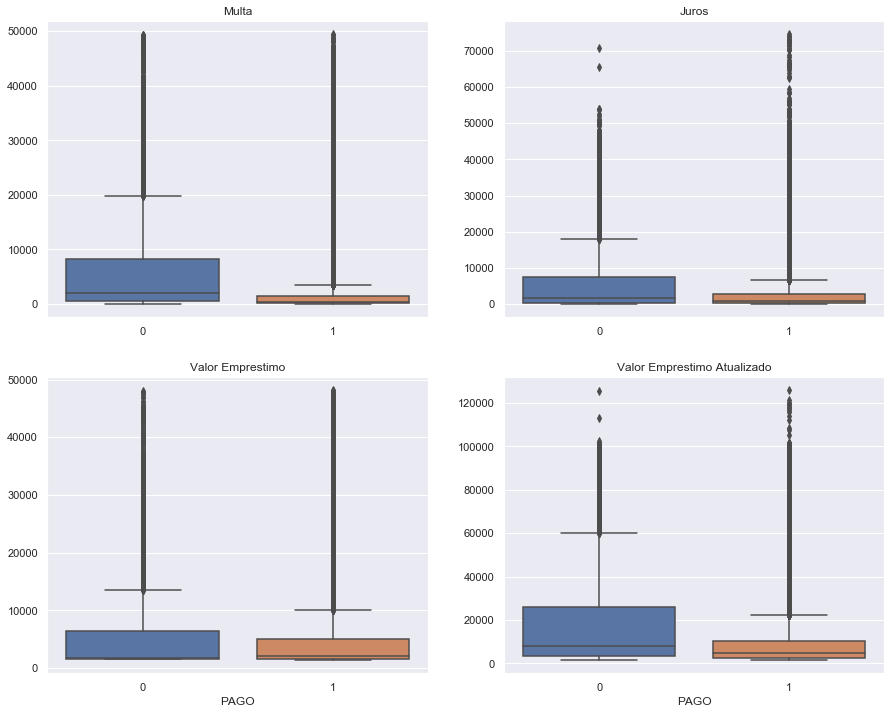

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

g1 = sns.boxplot(ax=ax[0,0], x="PAGO", y="Multa", data=dados)
g1.set_title('Multa')
g1.set(ylabel=None)
g1.set(xlabel=None)

g2 = sns.boxplot(ax=ax[0, 1], x="PAGO", y="Juros", data=dados)
g2.set_title('Juros')
g2.set(ylabel=None)
g2.set(xlabel=None)

g3 = sns.boxplot(ax=ax[1, 0], x="PAGO", y="Valor Emprestimo", data=dados)
g3.set_title('Valor Emprestimo')
g3.set(ylabel=None)

g4 = sns.boxplot(ax=ax[1, 1], x="PAGO", y="Valor Emprestimo Atualizado", data=dados)
g4.set_title('Valor Emprestimo Atualizado')
g4.set(ylabel=None)

plt.show()

<p style='text-align: justify;'>Desmembrando o box-plot entre os clientes que pagaram ou não, podemos ver alguns resultados interessantes.
Em todas as variáveis plotadas, o box-plot de quem não pagou o empréstimo foi mais sensível aos outliers, mas isso deve ocorrer devido ao fato dos nossos dados serem desbalanceados - menos 20% dos clientes não pagaram o empréstimo, assim, serão mais afetados pelos outliers, o que pode ser visto nos gráficos acima. Daqui a pouco farei outro tratamento nesses dados. Em todos os casos também, o Q3 - invertalo interquartílico 3, em todos os casos, os clientes que aplicaram default foram mais elevados dos que não aplicaram.

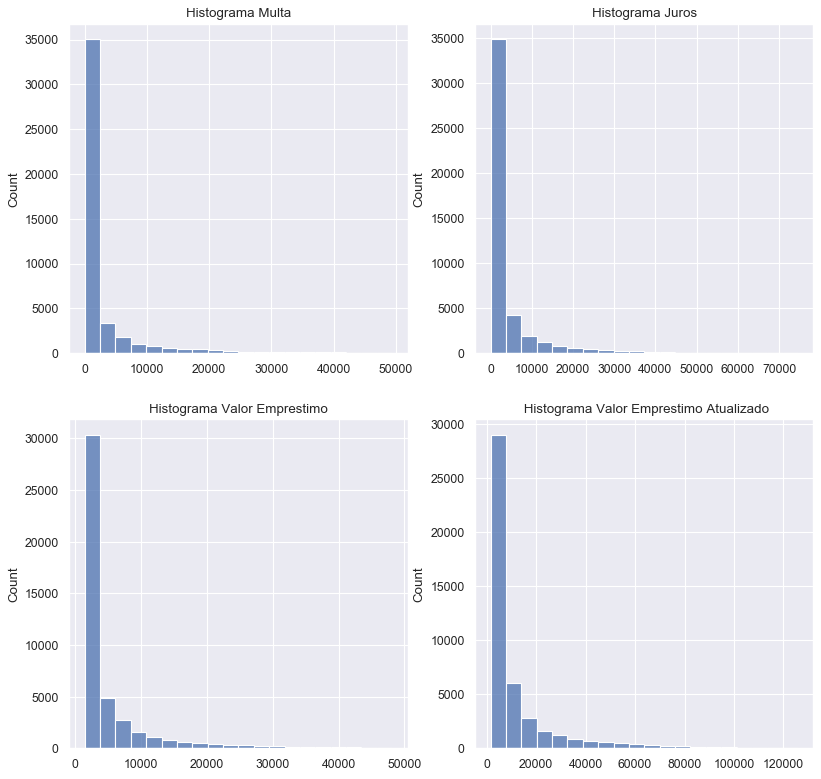

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), dpi = 80)

g1 = sns.histplot(data=dados, x="Multa", bins=20, ax=ax[0,0])
g1.set_title('Histograma Multa', fontsize = 12)
#g1.set(xticklabels=[]) 
g1.set(xlabel=None)
#g1.set(ylabel=None)
g1.tick_params(bottom=False)

g2 = sns.histplot(data=dados, x="Juros", bins=20, ax=ax[0,1])
g2.set_title('Histograma Juros', fontsize = 12)
#g2.set(xticklabels=[]) 
g2.set(xlabel=None)
#g2.set(ylabel=None)
g2.tick_params(bottom=False)

g3 = sns.histplot(data=dados, x="Valor Emprestimo", bins=20, ax=ax[1,0])
g3.set_title('Histograma Valor Emprestimo', fontsize = 12)
#g3.set(xticklabels=[]) 
g3.set(xlabel=None)
#g3.set(ylabel=None)
g3.tick_params(bottom=False)

g4 = sns.histplot(data=dados, x="Valor Emprestimo Atualizado", bins=20, ax=ax[1,1])
g4.set_title(' Histograma Valor Emprestimo Atualizado', fontsize = 12)
#g4.set(xticklabels=[]) 
g4.set(xlabel=None)
#g4.set(ylabel=None)
g4.tick_params(bottom=False)

plt.show()

O histograma da Multa, Juros, Valor Empréstimo e Valor Empréstimo Atualizado mostra como os valores estão bem concentrados a esquerda e uma queda exponencial para valores mais elevados.

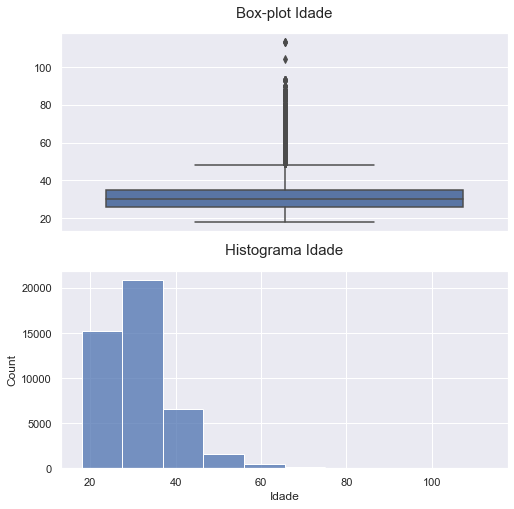

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

#plt.subplots(figsize = (6.5,5), dpi = 100)
g = sns.boxplot(data=dados['Idade'], ax=ax[0])
g.set_title('Box-plot Idade', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=dados, x="Idade", bins=10, ax=ax[1])
hist.set_title('Histograma Idade', fontsize = 15, y =1.05)
#hist.set(xticklabels=[]) 
#hist.set(xlabel=None)
#hist.tick_params(bottom=False)

plt.show()

<p style='text-align: justify;'>Pelo gráfico da idade, podemos verificar alguns outliers, contudo, o histograma indica existir alguma concentração de clientes em determinada faixa de idade, no nosso caso, com idade inferior a 40 anos. A seguir divido entre clientes que pagaram ou não a fim de verificar se encontro algum padrão.

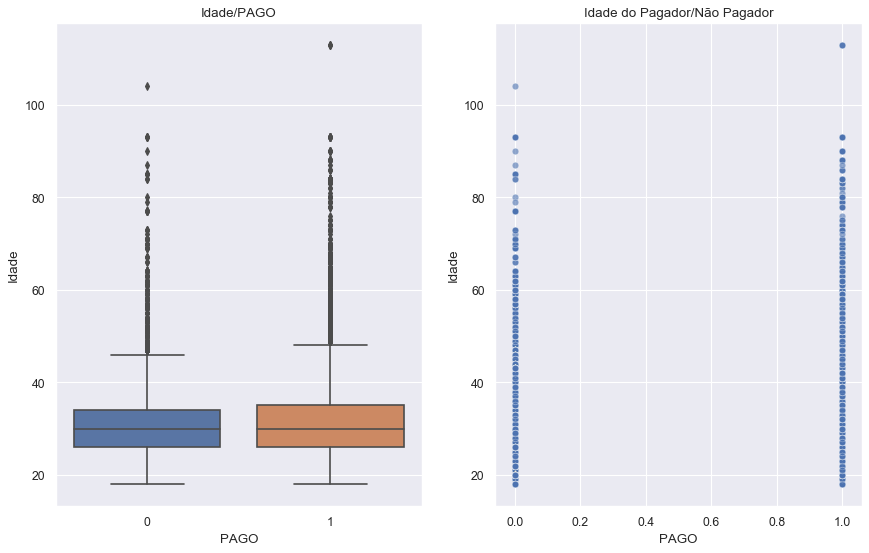

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(13, 8), dpi = 80)
g1 = sns.boxplot(x="PAGO", y="Idade", data=dados, ax=ax[0])
g1.set_title('Idade/PAGO')


g2 = sns.scatterplot(x="PAGO", y="Idade", data=dados, alpha=0.6, ax=ax[1])
g2.set_title("Idade do Pagador/Não Pagador")

plt.show()

<p style='text-align: justify;'>Fazendo a separação entre os pagadores e não pagadores do empréstimo e verificando a distribuição da idade deles, o box-plot daqueles que pagaram o empréstimo é levemente deslocado para cima em relação aos que não pagaram, mas não é nada muito discrepante. Ou seja, idade não parece ser uma variável que afete o pagamento ou não. O gráfico de dispersão reafirma esse insight.

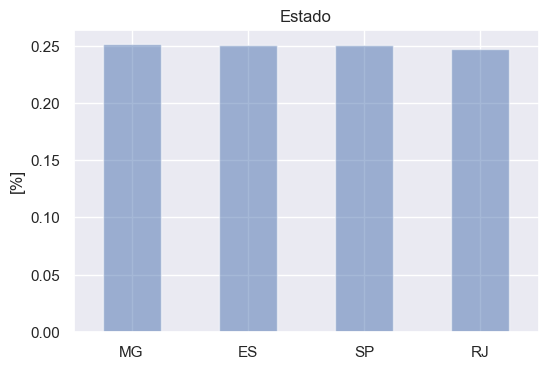

In [41]:
fig = plt.figure(figsize=(6,4), dpi = 100)
dados['Estado'].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Estado")
plt.ylabel('[%]')
plt.xticks(rotation=0)
plt.show()

<p style='text-align: justify;'>Os clientes estão bem divididos por estados, epnas RJ tem um pouco menos de clientes, mas nada muito alarmante. MG é o estado que mais possui clientes, mas é bem marginal essa liderança.

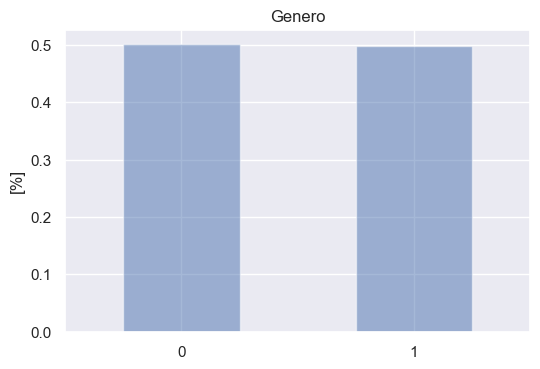

In [42]:
fig = plt.figure(figsize=(6,4), dpi = 100)
dados['Genero'].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Genero")
plt.ylabel('[%]')
plt.xticks(rotation=0)
plt.show()

Como podemos verificar, não há muita diferenças entre o gênero dos clientes.

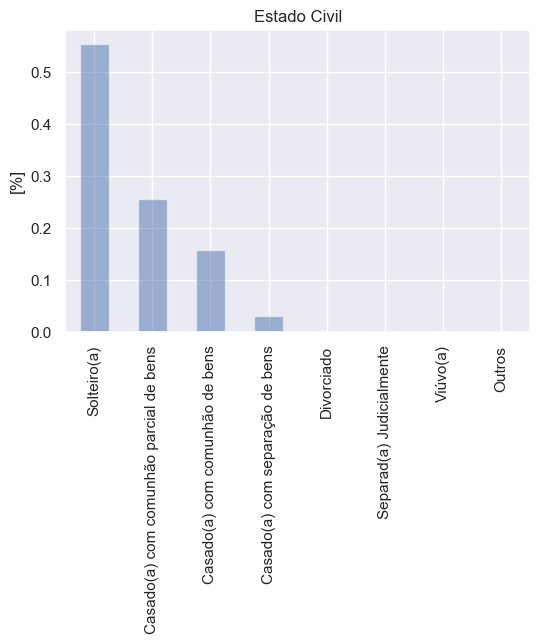

In [43]:
fig = plt.figure(figsize=(6,4), dpi = 100)
dados['Estado Civil'].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Estado Civil")
plt.ylabel('[%]')
plt.show()

<p style='text-align: justify;'>Já o estado civil, a ocorrência predominante é Solteiro(a), possuindo esse estado civil mais de 50% dos clientes. Em segundo lugar ficou Casado(a) com comunhão parcial de bens com um pouco mais de 25% e em terceiro Casado(a) com comunhão de bens com um pouco mais de 15%. Esses três tipos de estado civil quando somados, responderam por mais de 90% do estado civil dos clientes, dando a entender que os demais não possuem tanta ocorrência.

C:\Users\Manoel\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


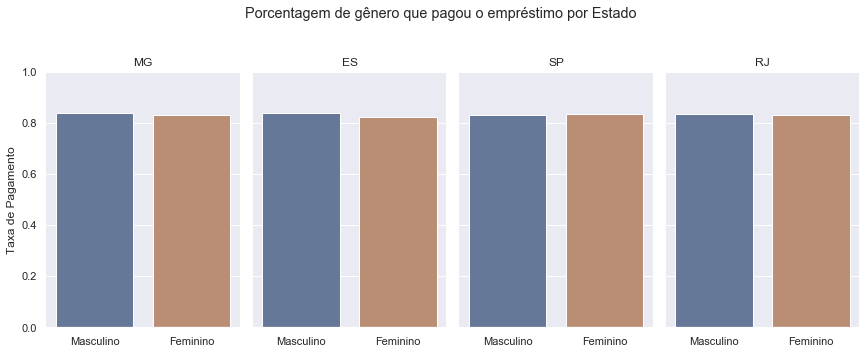

In [44]:
sns.set(font_scale=1)
g = sns.factorplot(x="Genero", y="PAGO", col="Estado",
                    data=dados, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Taxa de Pagamento")
    .set_xticklabels(["Masculino", "Feminino"])
    .set_titles("{col_name}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Porcentagem de gênero que pagou o empréstimo por Estado');

Dando prosseguimento a análise por região, quando verificado o sexo por região que pagou o empréstimo, novamente, foi bem equilibrado sem nenhuma mudança relevante. O gráfico acima deixa isso bem claro.

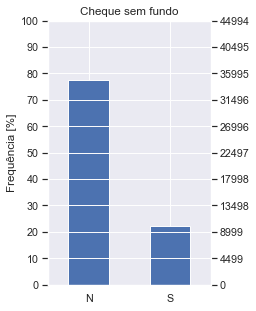

In [45]:
plt.figure(figsize=(3,5), dpi=70)
plt.title('Cheque sem fundo')
plt.xlabel('Cheque sem Fundo')
plt.ylabel('Frequência [%]')

ax = (dados['Cheque Sem Fundo'].value_counts()/len(dados)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(dados)/100)
ax.set(xlabel=None)
plt.show()

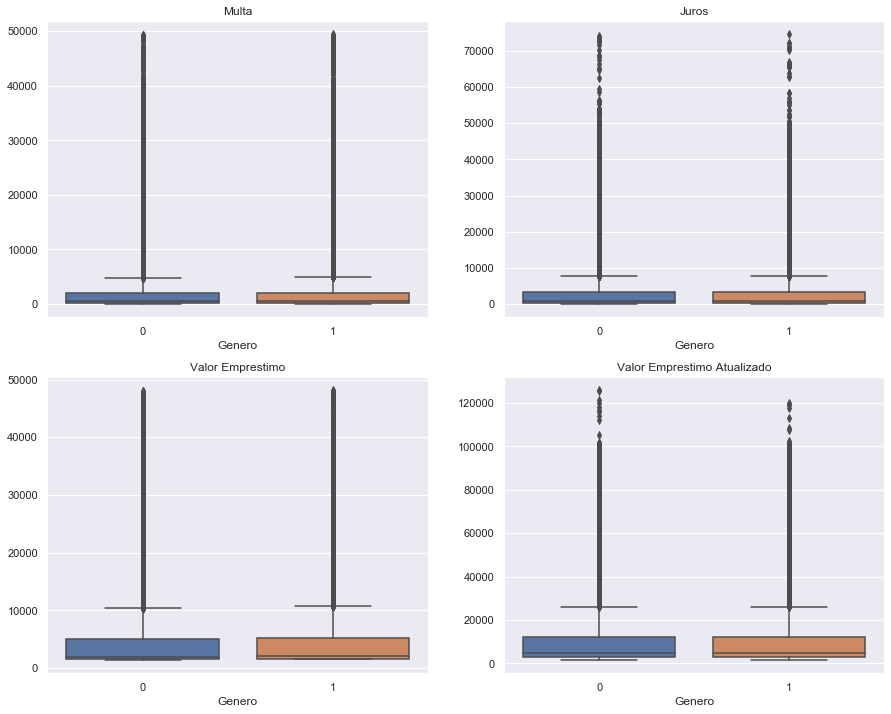

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

plt.title("Multa/Juros/Emprestimo por Gênero",fontsize=12)

g1 = sns.boxplot(ax=ax[0,0], x="Genero", y="Multa", data=dados)
g1.set_title('Multa')
g1.set(ylabel=None)

g2 = sns.boxplot(ax=ax[0, 1], x="Genero", y="Juros", data=dados)
g2.set_title('Juros')
g2.set(ylabel=None)

g3 = sns.boxplot(ax=ax[1, 0], x="Genero", y="Valor Emprestimo", data=dados)
g3.set_title('Valor Emprestimo')
g3.set(ylabel=None)

g4 = sns.boxplot(ax=ax[1, 1], x="Genero", y="Valor Emprestimo Atualizado", data=dados)
g4.set_title('Valor Emprestimo Atualizado')
g4.set(ylabel=None)


plt.show()

<p style='text-align: justify;'>Como pudemos ver, o Genero está bem distribuido a base dos clientes. Por ambos serem bem representados optei por verificar a relação entre as variáveis multa, juros, valor do empréstimo e valor do empréstimo atualizado. Olhando o box-plot não encontramos evidências de que o gênero afetou essas variáveis.

In [47]:
def bar_chart(feature, dataset):
    paleta_de_cores = ['lightblue', 'lightpink', 'darkcyan', 'darkgoldenrod', 'darkmagenta', 'slateblue', 'darksalmon', 'burlywood']
    
    survived = dataset[dataset['PAGO']==1][feature].value_counts(normalize=True)
    print(f"A distribuição do percentual da variável {feature} que pagaram foi:")
    print(np.round(dataset[dataset['PAGO']==1][feature].value_counts(normalize=True), 2)*100)
    
    dead = dataset[dataset['PAGO']==0][feature].value_counts(normalize=True)
    print(f"\nA distribuição do percentual da variável {feature} que não pagaram foi:")
    print(np.round(dataset[dataset['PAGO']==0][feature].value_counts(normalize=True), 2)*100)
    
    df = pd.DataFrame([survived,dead])
    df.index = ['Pagou','Não Pagou']
    df.plot(kind='bar', stacked=True, color = paleta_de_cores, figsize=(7,5))
    plt.xticks(rotation=0)
    plt.title(feature, fontsize = 15, y =1.05)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()
    return

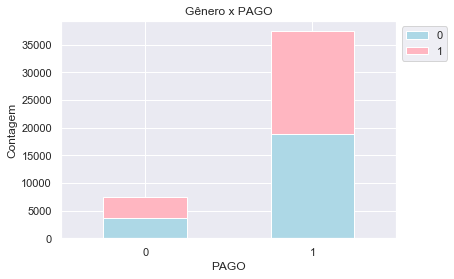

In [48]:
agrupando_genero = dados.groupby(['Genero', 'PAGO']).size().unstack().T
agrupando_genero.plot.bar(stacked=True, color = ["lightblue", "lightpink"])
plt.ylabel("Contagem")
plt.xlabel('PAGO')
plt.title('Gênero x PAGO')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

A distribuição do percentual da variável Genero que pagaram foi:
0    50.0
1    50.0
Name: Genero, dtype: float64

A distribuição do percentual da variável Genero que não pagaram foi:
1    51.0
0    49.0
Name: Genero, dtype: float64


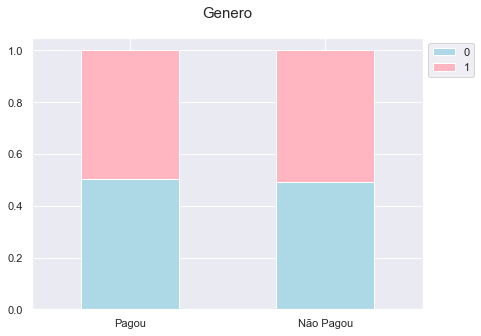

In [49]:
bar_chart('Genero', dados)

Pelo gráfico acima, não há indícios de acreditar que o gênero afete ou não o pagamento, uma vez que essa variável está bem dividida entre quem pagou ou não.

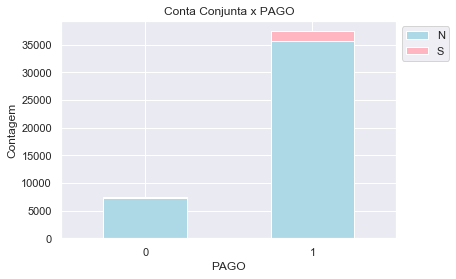

In [50]:
agrupando_conta_conjunta = dados.groupby(['Conta Conjunta', 'PAGO']).size().unstack().T
agrupando_conta_conjunta.plot.bar(stacked=True, color = ["lightblue", "lightpink"])
plt.ylabel("Contagem")
plt.xlabel('PAGO')
plt.title('Conta Conjunta x PAGO')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

A distribuição do percentual da variável Conta Conjunta que pagaram foi:
N    95.0
S     5.0
Name: Conta Conjunta, dtype: float64

A distribuição do percentual da variável Conta Conjunta que não pagaram foi:
N    98.0
S     2.0
Name: Conta Conjunta, dtype: float64


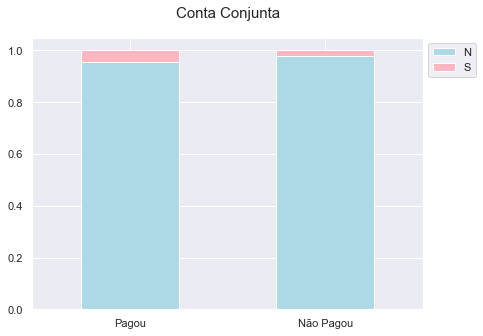

In [51]:
bar_chart('Conta Conjunta', dados)

Clientes que pagaram empréstimo possuem uma proporção muito pequena maior de que possuem conta conjunta. 

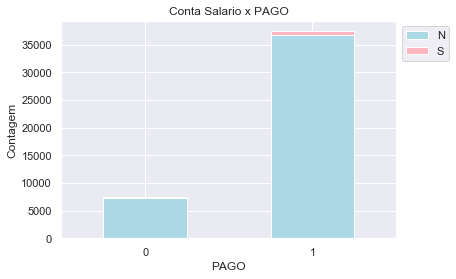

In [52]:
agrupando_conta_salario = dados.groupby(['Conta Salario', 'PAGO']).size().unstack().T
agrupando_conta_salario.plot.bar(stacked=True, color = ["lightblue", "lightpink"])
plt.ylabel("Contagem")
plt.xlabel('PAGO')
plt.title('Conta Salario x PAGO')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

A distribuição do percentual da variável Conta Salario que pagaram foi:
N    98.0
S     2.0
Name: Conta Salario, dtype: float64

A distribuição do percentual da variável Conta Salario que não pagaram foi:
N    98.0
S     2.0
Name: Conta Salario, dtype: float64


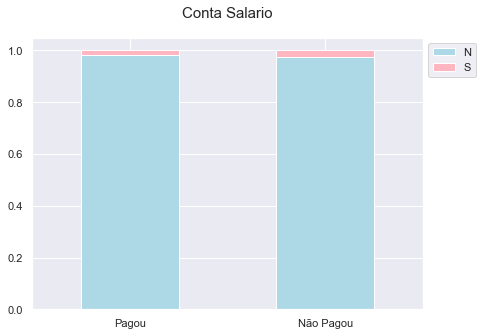

In [53]:
bar_chart('Conta Salario', dados)

Clientes que pagaram o empréstimo em termos proporcionais não parecem possuir diferenças em relação a quem não pagou.

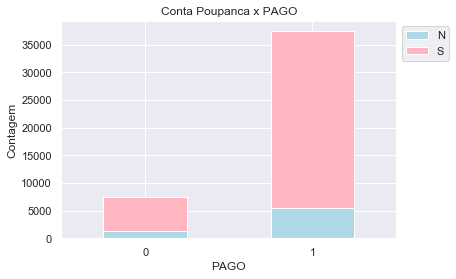

In [54]:
agrupando_conta_poupança = dados.groupby(['Conta Poupanca', 'PAGO']).size().unstack().T
agrupando_conta_poupança.plot.bar(stacked=True, color = ["lightblue", "lightpink"])
plt.ylabel("Contagem")
plt.xlabel('PAGO')
plt.title('Conta Poupanca x PAGO')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

A distribuição do percentual da variável Conta Poupanca que pagaram foi:
S    85.0
N    15.0
Name: Conta Poupanca, dtype: float64

A distribuição do percentual da variável Conta Poupanca que não pagaram foi:
S    82.0
N    18.0
Name: Conta Poupanca, dtype: float64


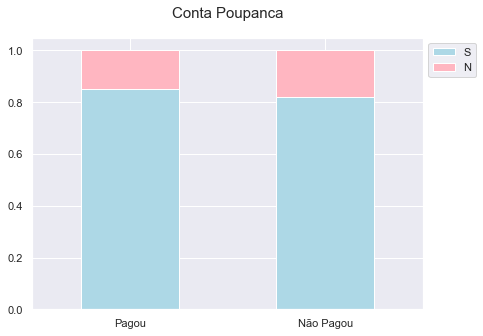

In [55]:
bar_chart('Conta Poupanca', dados)

Conta poupança não parece afetar o pagamento ou não do empréstimo, visto que su proporção é muito semelhante em ambos.

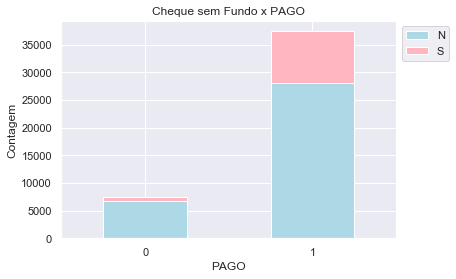

In [56]:
agrupando_cheque = dados.groupby(['Cheque Sem Fundo', 'PAGO']).size().unstack().T
agrupando_cheque.plot.bar(stacked=True, color = ["lightblue", "lightpink"])
plt.ylabel("Contagem")
plt.xlabel('PAGO')
plt.title('Cheque sem Fundo x PAGO')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

A distribuição do percentual da variável Cheque Sem Fundo que pagaram foi:
N    75.0
S    25.0
Name: Cheque Sem Fundo, dtype: float64

A distribuição do percentual da variável Cheque Sem Fundo que não pagaram foi:
N    90.0
S    10.0
Name: Cheque Sem Fundo, dtype: float64


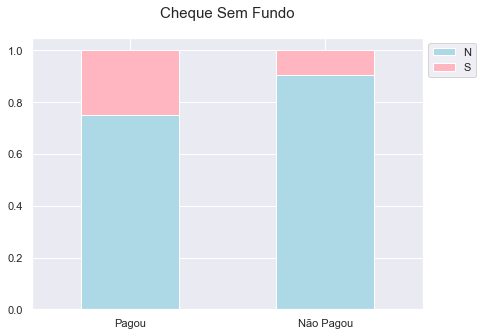

In [57]:
bar_chart('Cheque Sem Fundo', dados)

Quando analisado Cheque sem Fundo e clientes que pagaram ou não, proporcionalmente, clientes que pagaram pussem ter maior proporção de cheque sem fundo.

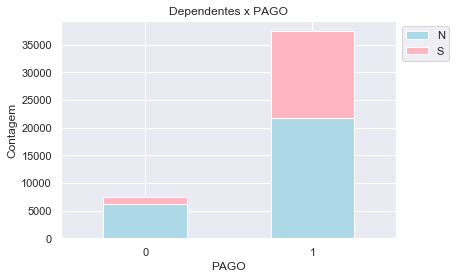

In [58]:
agrupando_dependentes = dados.groupby(['Dependentes', 'PAGO']).size().unstack().T
agrupando_dependentes.plot.bar(stacked=True, color = ["lightblue", "lightpink"])
plt.ylabel("Contagem")
plt.xlabel('PAGO')
plt.title('Dependentes x PAGO')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

A distribuição do percentual da variável Dependentes que pagaram foi:
N    58.0
S    42.0
Name: Dependentes, dtype: float64

A distribuição do percentual da variável Dependentes que não pagaram foi:
N    81.0
S    19.0
Name: Dependentes, dtype: float64


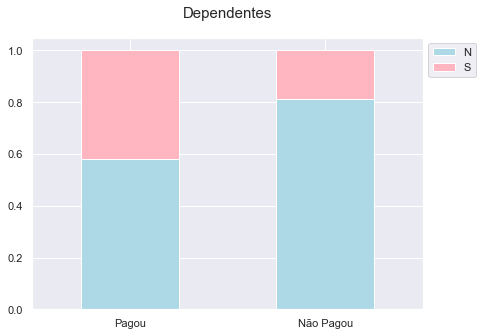

In [59]:
bar_chart('Dependentes', dados)

Verificando a relação entre dependentes e a variável alvo, há indícios de acreditarmos que clientes que pagaram os empréstimos possuem porporcionalmente mais dependentes que clientes que não pagaram.

A distribuição do percentual da variável Estado que pagaram foi:
MG    25.0
SP    25.0
ES    25.0
RJ    25.0
Name: Estado, dtype: float64

A distribuição do percentual da variável Estado que não pagaram foi:
ES    25.0
MG    25.0
SP    25.0
RJ    25.0
Name: Estado, dtype: float64


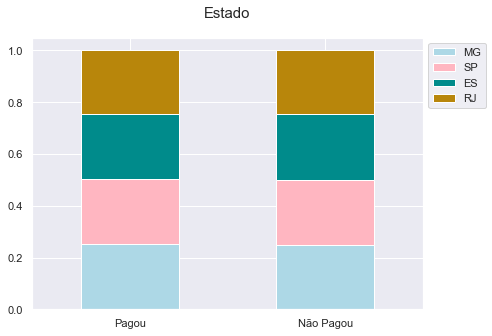

In [60]:
bar_chart('Estado', dados)

Estado também é uma variável muito bem distribuída e não parece relevante em relação a variável alvo.

A distribuição do percentual da variável Estado Civil que pagaram foi:
Solteiro(a)                               61.0
Casado(a) com comunhão parcial de bens    21.0
Casado(a) com comunhão de bens            15.0
Casado(a) com separação de bens            3.0
Divorciado                                 0.0
Separad(a) Judicialmente                   0.0
Viúvo(a)                                   0.0
Outros                                     0.0
Name: Estado Civil, dtype: float64

A distribuição do percentual da variável Estado Civil que não pagaram foi:
Casado(a) com comunhão parcial de bens    50.0
Solteiro(a)                               28.0
Casado(a) com comunhão de bens            18.0
Casado(a) com separação de bens            3.0
Separad(a) Judicialmente                   0.0
Viúvo(a)                                   0.0
Outros                                     0.0
Divorciado                                 0.0
Name: Estado Civil, dtype: float64


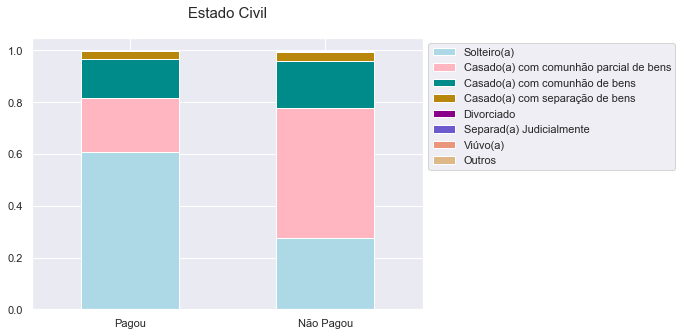

In [61]:
bar_chart('Estado Civil', dados)

O estado civil apresentou um resultado bem interesante. Dentre os clientes que pagaram, mais de 60% eram solteiros. Por outro lado, cerca de 50% dos clientes que não pagaram são Casado(a) com comunhão parcial de bens. A proporção dos demais estado civil ficaram bem semelhantes.

C:\Users\Manoel\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


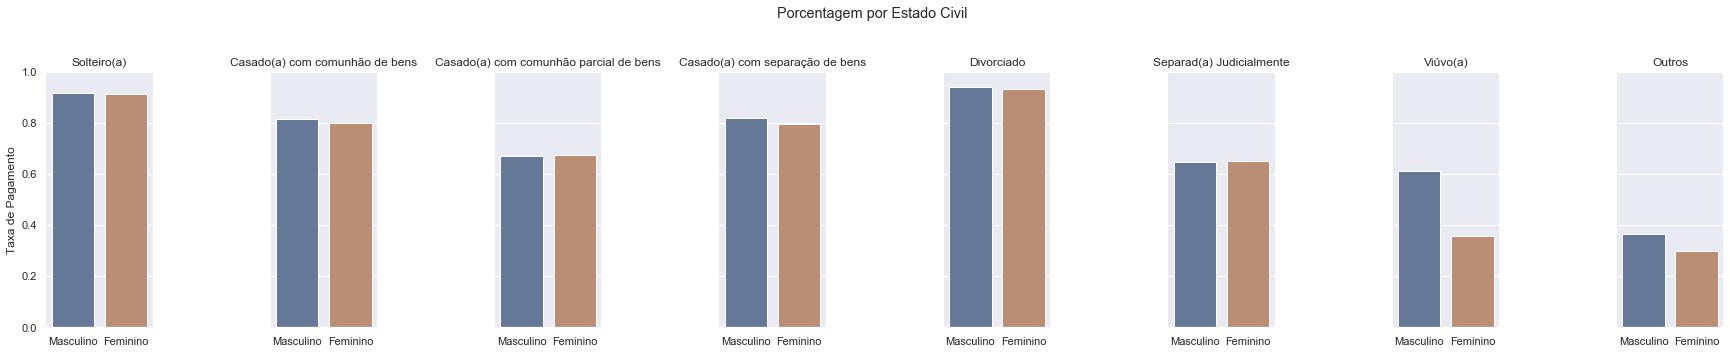

In [62]:
#sns.set(font_scale=1)
#plt.figure(figsize=(8,10), dpi=100)
g = sns.factorplot(x="Genero", y="PAGO", col="Estado Civil",
                    data=dados, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Taxa de Pagamento")
    .set_xticklabels(["Masculino", "Feminino"])
    .set_titles("{col_name}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Porcentagem por Estado Civil')
plt.show()

In [63]:
def gerando_dummies(dataframe_coluna):
    """
    gera variáveis dummies quando a coluna possui S ou N. Caso for S, retorna 1, caso contrário, retorna 0
    """
    
    if dataframe_coluna == 'S':
        return 1
    else:
        return 0

In [64]:
colunas_a_transformar = ['Dependentes', 'Conta Poupanca', 'Conta Salario', 'Cheque Sem Fundo', 'Conta Conjunta']

In [65]:
for coluna in colunas_a_transformar:
    dados[coluna] = dados[coluna].apply(gerando_dummies)

In [66]:
# Transforma cada estado civil e estado em dummies
dados = pd.get_dummies(dados, columns=["Estado Civil"], prefix=["Estado Civil"])
dados = pd.get_dummies(dados, columns=["Estado"], prefix=["Estado"])

In [67]:
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Idade,Conta Poupanca,Conta Salario,ID,Cheque Sem Fundo,...,Estado Civil_Casado(a) com separação de bens,Estado Civil_Divorciado,Estado Civil_Outros,Estado Civil_Separad(a) Judicialmente,Estado Civil_Solteiro(a),Estado Civil_Viúvo(a),Estado_ES,Estado_MG,Estado_RJ,Estado_SP
0,0,1,14282.55,1,1,36,1,0,1.328587e+06,0,...,0,0,0,0,1,0,0,1,0,0
1,2,1,51035.18,1,0,39,1,0,1.424254e+06,1,...,0,0,0,0,1,0,1,0,0,0
2,0,1,26032.84,1,0,23,0,0,1.426138e+06,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,2144.76,0,1,33,1,0,1.474504e+06,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,3469.92,0,0,40,1,0,1.341838e+06,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,2,0,51784.31,0,0,26,1,0,1.686687e+10,0,...,0,0,0,0,0,0,0,1,0,0
44990,2,0,2961.74,0,0,26,1,0,1.695679e+10,0,...,0,0,0,0,0,0,0,1,0,0
44991,0,0,1814.18,0,1,26,1,0,1.448218e+06,1,...,0,0,0,0,1,0,0,1,0,0
44992,2,0,2661.93,0,0,26,1,0,1.510609e+06,0,...,0,0,0,0,1,0,0,0,0,1


Para tratar os outliers restantes optei por fazer o seguinte:
- Logarítmo neperiano das variáveis Valor Emprestimo, Multa, Juros e Valor Emprestimo Atualizado.
- As idades acima do percentil 95 foram substituídas pela mediana.

In [68]:
colunas_a_emp = ['Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado']

In [69]:
for col in colunas_a_emp:
    dados[col] = np.log(dados[col])

In [70]:
dados['Idade'] = np.where(dados['Idade'] > dados['Idade'].quantile(0.95), dados['Idade'].median(), dados['Idade'])

In [71]:
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Idade,Conta Poupanca,Conta Salario,ID,Cheque Sem Fundo,...,Estado Civil_Casado(a) com separação de bens,Estado Civil_Divorciado,Estado Civil_Outros,Estado Civil_Separad(a) Judicialmente,Estado Civil_Solteiro(a),Estado Civil_Viúvo(a),Estado_ES,Estado_MG,Estado_RJ,Estado_SP
0,0,1,9.566794,1,1,36.0,1,0,1.328587e+06,0,...,0,0,0,0,1,0,0,1,0,0
1,2,1,10.840270,1,0,39.0,1,0,1.424254e+06,1,...,0,0,0,0,1,0,1,0,0,0
2,0,1,10.167114,1,0,23.0,0,0,1.426138e+06,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,7.670783,0,1,33.0,1,0,1.474504e+06,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,8.151887,0,0,40.0,1,0,1.341838e+06,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,2,0,10.854842,0,0,26.0,1,0,1.686687e+10,0,...,0,0,0,0,0,0,0,1,0,0
44990,2,0,7.993532,0,0,26.0,1,0,1.695679e+10,0,...,0,0,0,0,0,0,0,1,0,0
44991,0,0,7.503389,0,1,26.0,1,0,1.448218e+06,1,...,0,0,0,0,1,0,0,1,0,0
44992,2,0,7.886807,0,0,26.0,1,0,1.510609e+06,0,...,0,0,0,0,1,0,0,0,0,1


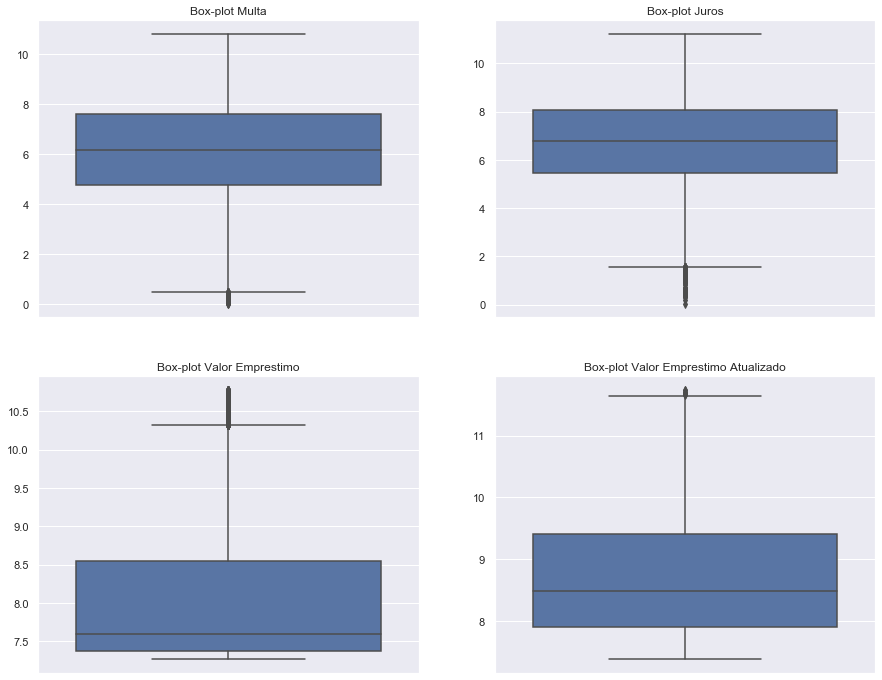

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

g1 = sns.boxplot(data=dados['Multa'], ax=ax[0,0])
g1.set_title('Box-plot Multa')
g1.set(xticklabels=[]) 
g1.set(xlabel=None)
g1.tick_params(bottom=False)

g2 = sns.boxplot(data=dados['Juros'], ax=ax[0,1])
g2.set_title('Box-plot Juros')
g2.set(xticklabels=[]) 
g2.set(xlabel=None)
g2.tick_params(bottom=False)

g3 = sns.boxplot(data=dados['Valor Emprestimo'], ax=ax[1,0])
g3.set_title('Box-plot Valor Emprestimo')
g3.set(xticklabels=[]) 
g3.set(xlabel=None)
g3.tick_params(bottom=False)

g4 = sns.boxplot(data=dados['Valor Emprestimo Atualizado'], ax=ax[1,1])
g4.set_title('Box-plot Valor Emprestimo Atualizado')
g4.set(xticklabels=[]) 
g4.set(xlabel=None)
g4.tick_params(bottom=False)

plt.show()

Ao plotar o box-plot após fazer o log, percebemos que a presença de outliers reduzuiu consideravelmente. Não apenas isso, Juros e Multa passaram a possuir outliers negativos, enquanto Valor Empéstimo e Valor Empréstimo Atulizado continuaram com outliers positivos.

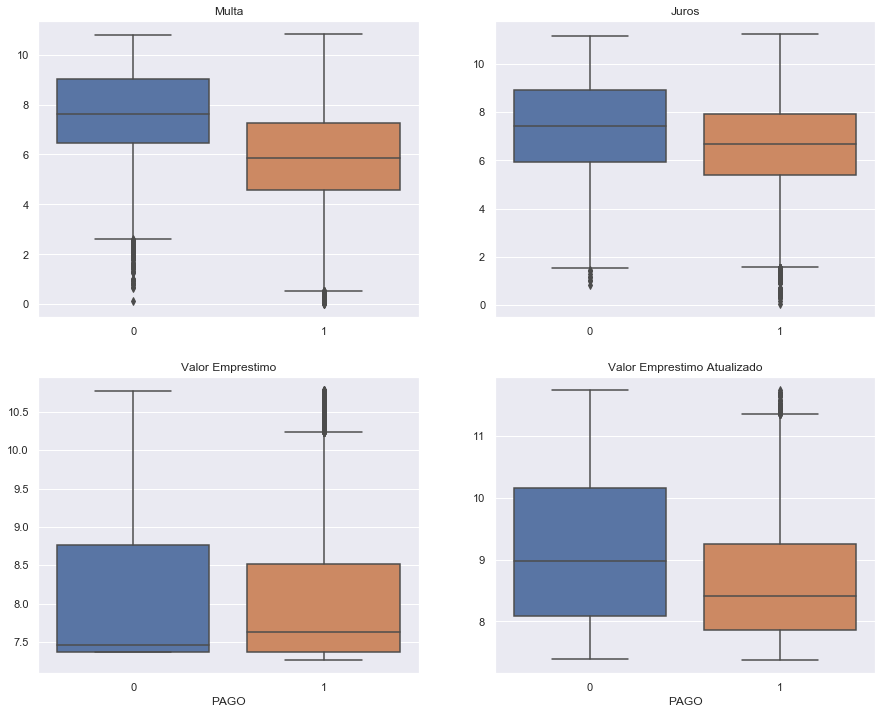

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

g1 = sns.boxplot(ax=ax[0,0], x="PAGO", y="Multa", data=dados)
g1.set_title('Multa')
g1.set(ylabel=None)
g1.set(xlabel=None)

g2 = sns.boxplot(ax=ax[0, 1], x="PAGO", y="Juros", data=dados)
g2.set_title('Juros')
g2.set(ylabel=None)
g2.set(xlabel=None)

g3 = sns.boxplot(ax=ax[1, 0], x="PAGO", y="Valor Emprestimo", data=dados)
g3.set_title('Valor Emprestimo')
g3.set(ylabel=None)

g4 = sns.boxplot(ax=ax[1, 1], x="PAGO", y="Valor Emprestimo Atualizado", data=dados)
g4.set_title('Valor Emprestimo Atualizado')
g4.set(ylabel=None)

plt.show()

Desmembrando o box-plot em relação a variável target, podemos tirar as seguintes conclusões: os boxes de clientes que não pagaram os empréstimos são mais deslocados para cima, indicando que todos o quartis em relação aos clientes que pagaram possuem valores maiores.

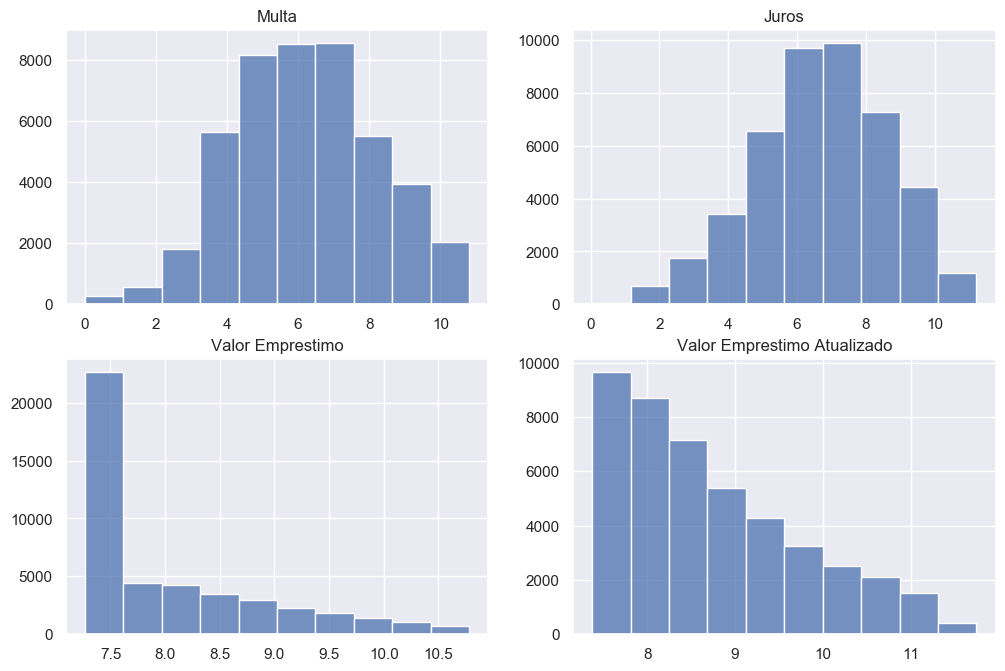

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi = 100)

g1 = sns.histplot(data=dados, x="Multa", bins=10, ax=ax[0,0])
g1.set_title('Multa', fontsize = 12)
#g1.set(xticklabels=[]) 
g1.set(xlabel=None)
g1.set(ylabel=None)
g1.tick_params(bottom=False)

g2 = sns.histplot(data=dados, x="Juros", bins=10, ax=ax[0,1])
g2.set_title('Juros', fontsize = 12)
#g2.set(xticklabels=[]) 
g2.set(xlabel=None)
g2.set(ylabel=None)
g2.tick_params(bottom=False)

g3 = sns.histplot(data=dados, x="Valor Emprestimo", bins=10, ax=ax[1,0])
g3.set_title('Valor Emprestimo', fontsize = 12)
#g3.set(xticklabels=[]) 
g3.set(xlabel=None)
g3.set(ylabel=None)
g3.tick_params(bottom=False)

g4 = sns.histplot(data=dados, x="Valor Emprestimo Atualizado", bins=10, ax=ax[1,1])
g4.set_title('Valor Emprestimo Atualizado', fontsize = 12)
#g4.set(xticklabels=[]) 
g4.set(xlabel=None)
g4.set(ylabel=None)
g4.tick_params(bottom=False)

plt.show()

<p style='text-align: justify;'>Com relação ao histograma, a distribuição das variáveis Multa e Juros melhoraram bastante, apesar de ainda não pussuírem uma distribuição normal. Valor do Empréstimo apresentou um distribuição bem concentrada a esquerda e um decaimento exponencial, enquanto valor do empréstimo atualizado a distribuição é concentrada a esquerda com decaimento mais linear.

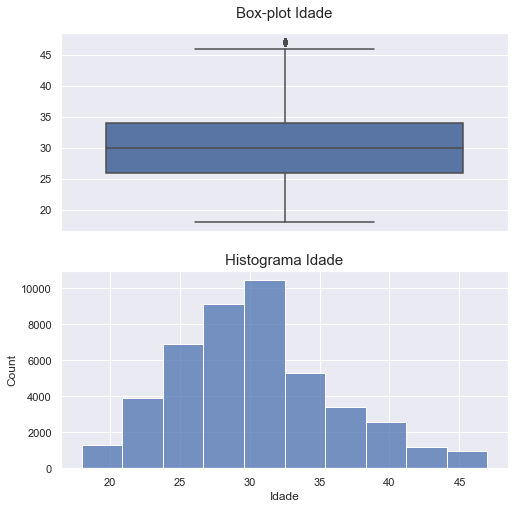

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

g = sns.boxplot(data=dados['Idade'], ax=ax[0])
g.set_title('Box-plot Idade', fontsize = 15, y =1.05)
g.set(xticklabels=[]) 
g.set(xlabel=None)
g.tick_params(bottom=False)

hist = sns.histplot(data=dados, x="Idade", bins=10, ax=ax[1])
hist.set_title('Histograma Idade', fontsize = 15)

plt.show()

Já idade, após a substituição dos valores acima do percentil 95, os outliers paticamente desaparececeram - pelo box-plot parece permanecer ainda um e o histograma em relação a idade é assimétrico a esquerda.

In [76]:
dados.dtypes

Quant Adiantamento Deposito                              int32
PAGO                                                     int64
Valor Emprestimo Atualizado                            float64
Genero                                                   int64
Dependentes                                              int64
Idade                                                  float64
Conta Poupanca                                           int64
Conta Salario                                            int64
ID                                                     float64
Cheque Sem Fundo                                         int64
Conta Conjunta                                           int64
Data                                                    object
Controle                                                 int64
Valor Emprestimo                                       float64
Multa                                                  float64
Juros                                                  

A seguir o optei por dropar as seguintes colunas pelos motivos específicos:
- todas as linhas iguais: controle e Data.
- não fornece nenhuma informação muito revelante: ID.
- já porporcionaram informação relevante e não são mais necssárias: Emp/Atualizado, Multa/Atualizado, Juros/Atualizado.

In [77]:
a_dropar = ['Controle', 'Data', 'ID', 'Emp/Atualizado', 'Multa/Atualizado', 'Juros/Atualizado']

dados = dados.drop(a_dropar, axis = 1)

In [78]:
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Idade,Conta Poupanca,Conta Salario,Cheque Sem Fundo,Conta Conjunta,...,Estado Civil_Casado(a) com separação de bens,Estado Civil_Divorciado,Estado Civil_Outros,Estado Civil_Separad(a) Judicialmente,Estado Civil_Solteiro(a),Estado Civil_Viúvo(a),Estado_ES,Estado_MG,Estado_RJ,Estado_SP
0,0,1,9.566794,1,1,36.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,1,10.840270,1,0,39.0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,10.167114,1,0,23.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,7.670783,0,1,33.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,8.151887,0,0,40.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,2,0,10.854842,0,0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44990,2,0,7.993532,0,0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44991,0,0,7.503389,0,1,26.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
44992,2,0,7.886807,0,0,26.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [79]:
def mudando_variavel_interesse(coluna_target):
    if coluna_target == 0:
        return 1
    else:
        return 0

In [80]:
dados['PAGO'] = dados['PAGO'].apply(mudando_variavel_interesse)

In [81]:
dados

,Quant Adiantamento Deposito,PAGO,Valor Emprestimo Atualizado,Genero,Dependentes,Idade,Conta Poupanca,Conta Salario,Cheque Sem Fundo,Conta Conjunta,...,Estado Civil_Casado(a) com separação de bens,Estado Civil_Divorciado,Estado Civil_Outros,Estado Civil_Separad(a) Judicialmente,Estado Civil_Solteiro(a),Estado Civil_Viúvo(a),Estado_ES,Estado_MG,Estado_RJ,Estado_SP
0,0,0,9.566794,1,1,36.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,0,10.840270,1,0,39.0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,10.167114,1,0,23.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,7.670783,0,1,33.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,0,8.151887,0,0,40.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,2,1,10.854842,0,0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44990,2,1,7.993532,0,0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44991,0,1,7.503389,0,1,26.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
44992,2,1,7.886807,0,0,26.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Seleção de Featuring:

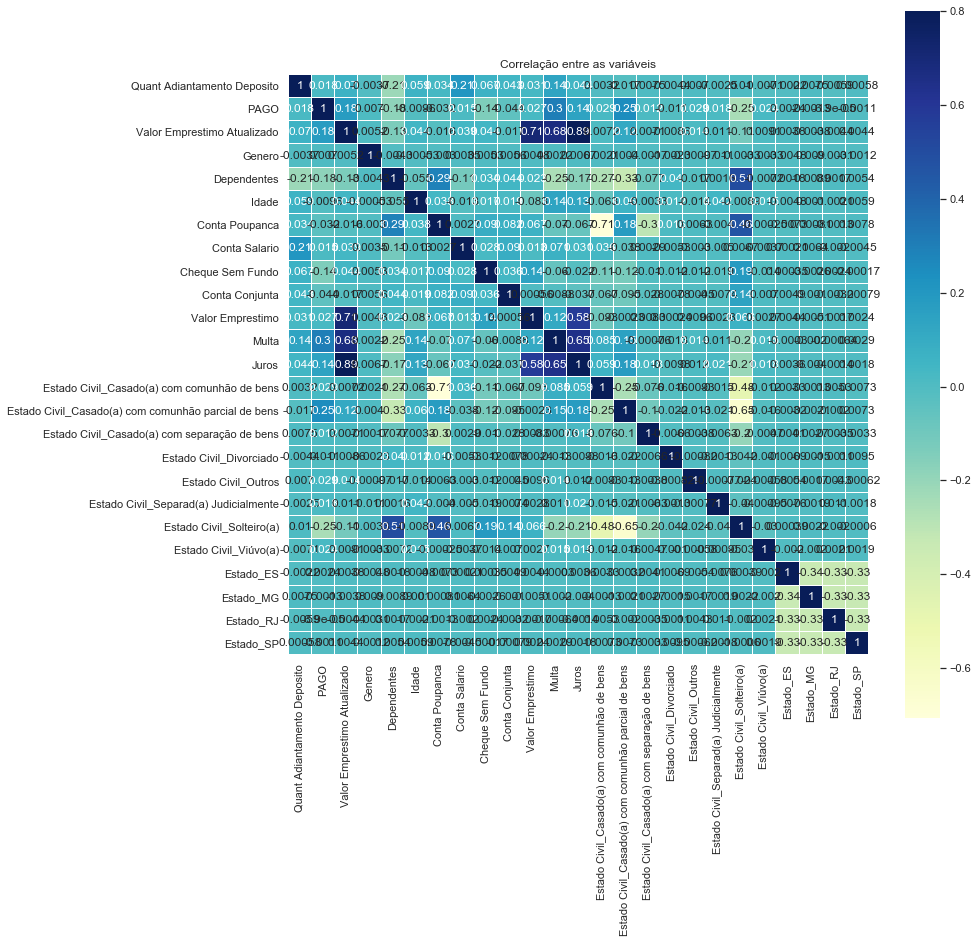

In [82]:
corr=dados.corr()
plt.figure(figsize=(13, 13))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlação entre as variáveis');

A correlação dá ideia da relação entre as variáveis. Sendo assim, para seleção de variáveis utilizei como critério variáveis que tiveram uma correlação da seguinte forma com a variável alvo (PAGO):

manter = |0.1| < corr < |0.9|

Ou seja, mantive todas as variáveis que tiveram uma correlação acima de 0.1 e menor que 0.9 em módulo com a variável alvo. A seguir faço esse cálculo.

In [83]:
correlacao = dados.corr()
target = 'PAGO'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.1)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.1))]
manter = list(corr.index)

In [84]:
manter

['Valor Emprestimo Atualizado',
 'Dependentes',
 'Cheque Sem Fundo',
 'Multa',
 'Juros',
 'Estado Civil_Casado(a) com comunhão parcial de bens',
 'Estado Civil_Solteiro(a)']

# Modelagem:

A modelagem foi primeiro feita sem nenhuma técnica. Os modelos selecionados foram os seguintes:

- Logistic Regression
- SVC
- K Neighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier 
- Gradient Boosting Classifier

Como métrica utlizei accuracy, precison, recall e f1, mas todos referentes ao default - 0, uma vez que o interesse do credor é identificar os clientes potenciais que tomarão o empréstimo e não pagarão. Para isso, fiz uma função específica calculando essas métricas em relação a variável 0, que é o default.

In [85]:
X = dados[manter]
y = dados[target]

In [86]:
X

,Valor Emprestimo Atualizado,Dependentes,Cheque Sem Fundo,Multa,Juros,Estado Civil_Casado(a) com comunhão parcial de bens,Estado Civil_Solteiro(a)
0,9.566794,1,0,5.573104,8.673338,0,1
1,10.840270,0,1,7.382305,8.942756,0,1
2,10.167114,0,0,9.974522,7.995468,0,0
3,7.670783,1,0,2.967333,3.836221,0,1
4,8.151887,0,0,6.944511,6.732783,0,1
...,...,...,...,...,...,...,...
44989,10.854842,0,0,10.491850,9.558922,1,0
44990,7.993532,0,0,7.102088,5.038510,1,0
44991,7.503389,1,1,5.269506,3.290638,0,1
44992,7.886807,0,0,6.945436,3.418710,0,1


In [87]:
def metricas(matriz_confusao):
    accuracy = np.round((matriz_confusao[0][0]+matriz_confusao[1][1])/((matriz_confusao[0][1]+matriz_confusao[0][0]+matriz_confusao[1][1]+matriz_confusao[1][0])), 4)
    precision = np.round(matriz_confusao[0][0]/(matriz_confusao[0][1]+matriz_confusao[0][0]), 4)
    recall = np.round(matriz_confusao[0][0]/(matriz_confusao[1][0]+matriz_confusao[0][0]), 4)
    f1 = np.round(2*((precision*recall)/(precision+recall)), 4)
    
    resultados = {'accuracy':accuracy*100,
                  'precision': precision*100,
                  'recall': recall*100,
                  'f1':f1*100}
    return resultados

In [88]:
models = ['Logistic Regression', 'SVC', 'K Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [90]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
conf = confusion_matrix(y_test, log_reg_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, log_reg_pred))
precision_list.append(precision_score(y_test, log_reg_pred))
recall_list.append(recall_score(y_test, log_reg_pred))
f1_list.append(f1_score(y_test, log_reg_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, log_reg_pred))

A Matriz de confusão foi:
[[10983   318]
 [ 1665   533]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     11301
           1       0.63      0.24      0.35      2198

    accuracy                           0.85     13499
   macro avg       0.75      0.61      0.63     13499
weighted avg       0.83      0.85      0.82     13499



In [91]:
# svc
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
conf = confusion_matrix(y_test, sv_clf_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, sv_clf_pred))
precision_list.append(precision_score(y_test, sv_clf_pred))
recall_list.append(recall_score(y_test, sv_clf_pred))
f1_list.append(f1_score(y_test, sv_clf_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, sv_clf_pred))

A Matriz de confusão foi:
[[11185   116]
 [ 1959   239]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     11301
           1       0.67      0.11      0.19      2198

    accuracy                           0.85     13499
   macro avg       0.76      0.55      0.55     13499
weighted avg       0.82      0.85      0.80     13499



In [92]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
conf = confusion_matrix(y_test, kn_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, kn_pred))
precision_list.append(precision_score(y_test, kn_pred))
recall_list.append(recall_score(y_test, kn_pred))
f1_list.append(f1_score(y_test, kn_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, kn_pred))

A Matriz de confusão foi:
[[10920   381]
 [ 1432   766]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11301
           1       0.67      0.35      0.46      2198

    accuracy                           0.87     13499
   macro avg       0.78      0.66      0.69     13499
weighted avg       0.85      0.87      0.85     13499



In [93]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
conf = confusion_matrix(y_test, dt_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, dt_pred))
precision_list.append(precision_score(y_test, dt_pred))
recall_list.append(recall_score(y_test, dt_pred))
f1_list.append(f1_score(y_test, dt_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, dt_pred))

A Matriz de confusão foi:
[[11301     0]
 [ 2198     0]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     11301
           1       0.00      0.00      0.00      2198

    accuracy                           0.84     13499
   macro avg       0.42      0.50      0.46     13499
weighted avg       0.70      0.84      0.76     13499



C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\metrics\_classificati

In [94]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
conf = confusion_matrix(y_test, r_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, r_pred))
precision_list.append(precision_score(y_test, r_pred))
recall_list.append(recall_score(y_test, r_pred))
f1_list.append(f1_score(y_test, r_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, r_pred))

A Matriz de confusão foi:
[[10639   662]
 [ 1246   952]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11301
           1       0.59      0.43      0.50      2198

    accuracy                           0.86     13499
   macro avg       0.74      0.69      0.71     13499
weighted avg       0.85      0.86      0.85     13499



In [95]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier()
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
conf = confusion_matrix(y_test, gradientboost_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, gradientboost_pred))
precision_list.append(precision_score(y_test, gradientboost_pred))
recall_list.append(recall_score(y_test, gradientboost_pred))
f1_list.append(f1_score(y_test, gradientboost_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, gradientboost_pred))

A Matriz de confusão foi:
[[10916   385]
 [ 1490   708]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11301
           1       0.65      0.32      0.43      2198

    accuracy                           0.86     13499
   macro avg       0.76      0.64      0.68     13499
weighted avg       0.84      0.86      0.84     13499



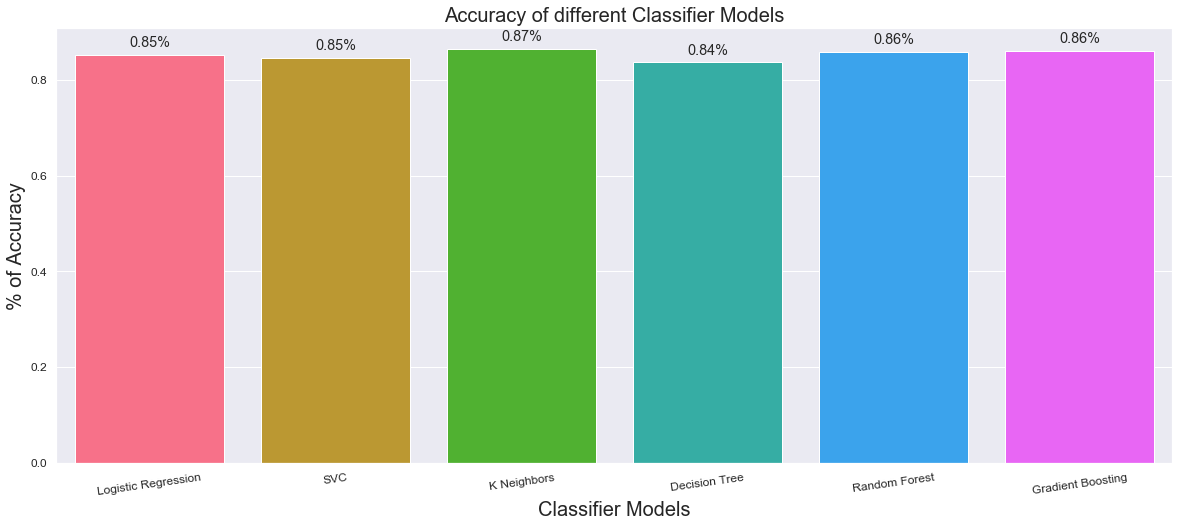

In [96]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'large')
plt.show()

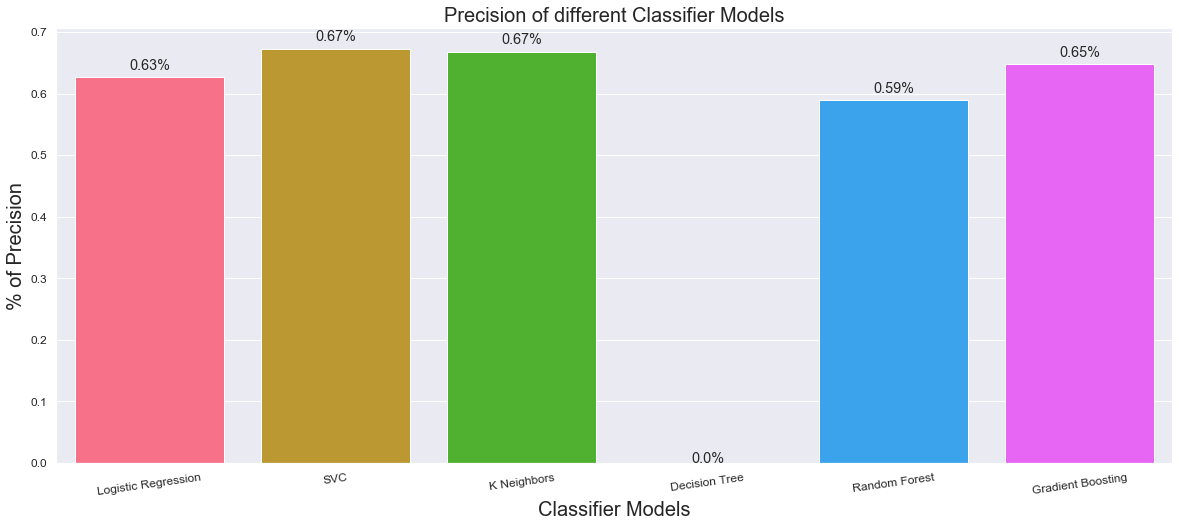

In [97]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=precision_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Precision', fontsize = 20)
plt.title('Precision of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'large')
plt.show()

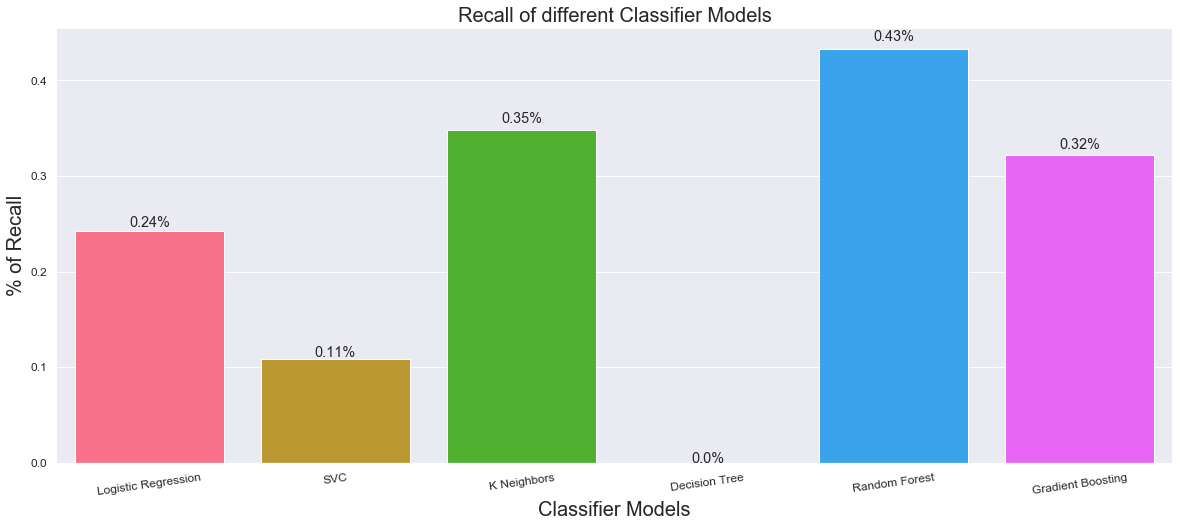

In [98]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=recall_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Recall', fontsize = 20)
plt.title('Recall of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'large')
plt.show()

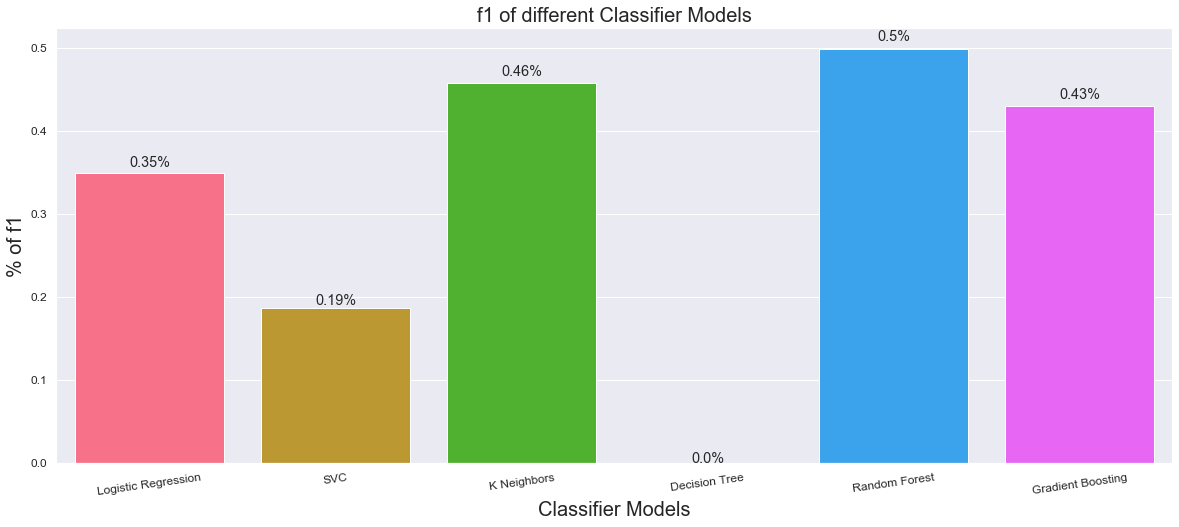

In [99]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=f1_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of f1', fontsize = 20)
plt.title('f1 of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'large')
plt.show()

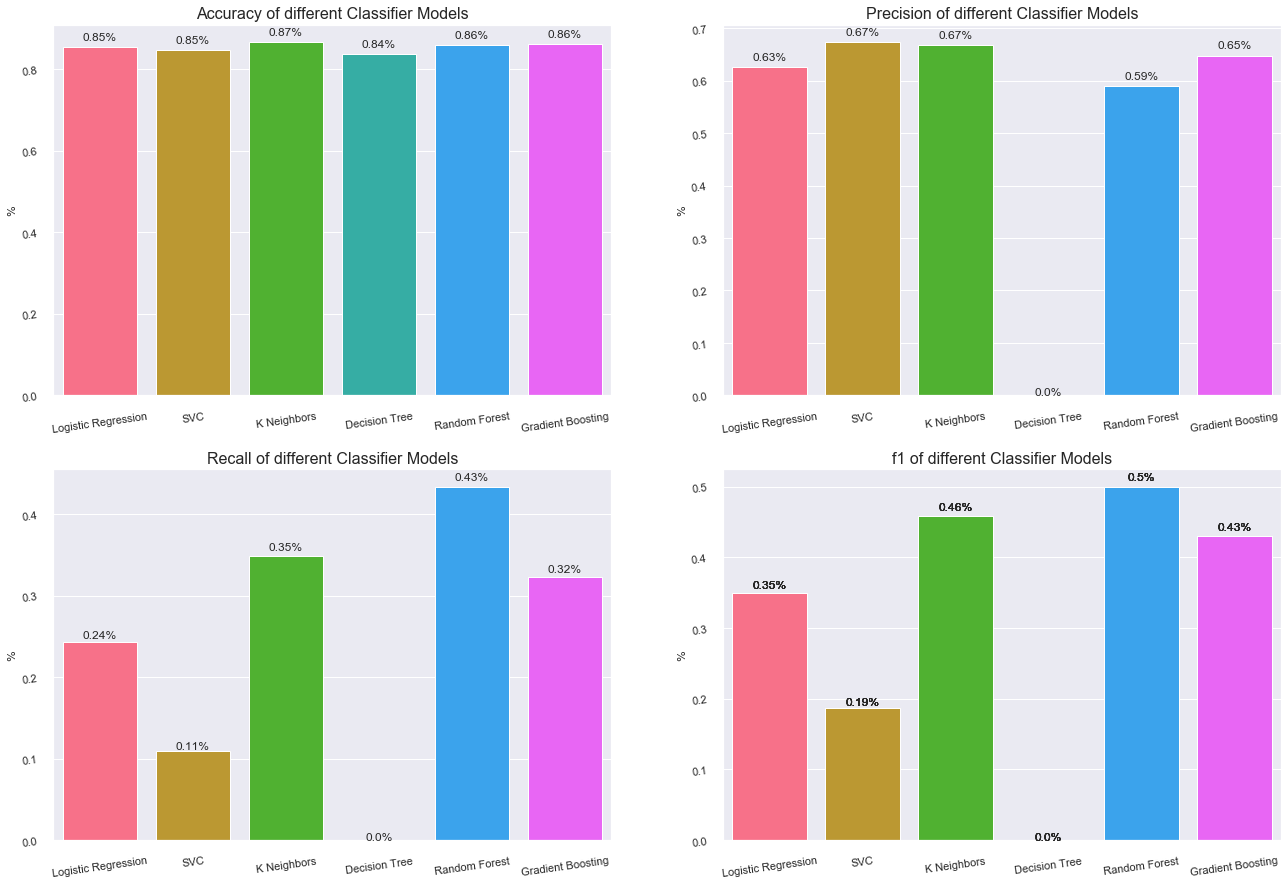

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(22,15))

g1 = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0, ax=ax[0,0])
g1.set_title('Accuracy of different Classifier Models', fontsize = 16)
g1.set(xlabel=None)
g1.set(ylabel='%')
g1.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g1.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g1.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g2 = sns.barplot(x=models, y=precision_list, palette = "husl", saturation =2.0, ax=ax[0,1])
g2.set_title('Precision of different Classifier Models', fontsize = 16)
g2.set(xlabel=None)
g2.set(ylabel='%')
g2.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g2.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g2.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g3 = sns.barplot(x=models, y=recall_list, palette = "husl", saturation =2.0, ax=ax[1,0])
g3.set_title('Recall of different Classifier Models', fontsize = 16)
g3.set(xlabel=None)
g3.set(ylabel='%')
g3.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g3.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g3.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


    g4 = sns.barplot(x=models, y=f1_list, palette = "husl", saturation =2.0, ax=ax[1,1])
g4.set_title('f1 of different Classifier Models', fontsize = 16)
g4.set(xlabel=None)
g4.set(ylabel='%')
g4.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g4.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g4.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')

plt.show()

<p style='text-align: justify;'>Quando verificamos a accuracy percebemos que todos os modelos ficaram bem próximos e não apenas isso, tiveram um bom índice - todos acima de 80%. Mas esse número é enganoso, uma vez que nosso dataset é desbalanceado. Sendo assim, quis aprofundar a análise do resultados em torno dos clientes que deram default, aqueles que não pagaram o empréstimo, que é uma parcela bem menor. Assim, calculei o recall, precision e f1 em torno desses clientes.

<p style='text-align: justify;'>Ao ver essas métricas, o resultado passou a não ser assim tão bom. Precision dos modelos ficaram próximas, contudo decision tree classifier ilustra se tivesse cedido crédito a todos os clientes, que tirando accuracy, passou a ter métricas não mais boas. Recall apresentou uma piora significativa o melhor estimdor aqui teve 43%. f1 equilibra precision e recall e o melhor estimador, Random Forest, foi avaliado em 50%, uma vez que é uma média ponderada de Recall e Precision.

<p style='text-align: justify;'>Dessa forma, testarei duas técnicas que tem por objetivo ajustarem o dataset de forma que a variável alvo fique balanceada. O método NearMiss reduz o dataset com um número menor de linhas, enquanto SMOTE multiplica linhas a balancear a o dataset. O objetivo é realizar essas técnicas e comparar com o dataset original. Antes disso, farei um GridsearchCV para obter o melhor modelo.

Dessa forma, nossas duas escolhas para o gridserarch, serão o K Neigbbors e Random Forest.

In [101]:
def escolhendo_melhores_parametros(modelo, parametros_modelo, escores, explicativas_treino, target_treino):
    melhor = GridSearchCV(modelo, parametros_modelo, scoring=escores, cv=5, verbose=2, refit='f1', n_jobs=-1, return_train_score=True)
    melhor.fit(explicativas_treino, target_treino)
    return melhor.best_estimator_

In [102]:
parametros_rfc = {
    'n_estimators': [100, 300, 800],
    'max_depth': [5, 30],
    'min_samples_split': [1.0, 15, 100],
    'min_samples_leaf': [1, 5, 10] 
    }

parametros_knn = {'n_neighbors': [1, 3, 7, 15, 35],
    'leaf_size': [1, 5 ,7, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
    }


In [103]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [104]:
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [105]:
rfc_ = escolhendo_melhores_parametros(rfc, parametros_rfc, scoring, X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [106]:
rfc_.fit(X_train, y_train)
predictions = rfc_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[10821   480]
 [ 1293   905]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11301
           1       0.65      0.41      0.51      2198

    accuracy                           0.87     13499
   macro avg       0.77      0.68      0.71     13499
weighted avg       0.85      0.87      0.86     13499



In [107]:
knn_ = escolhendo_melhores_parametros(knn, parametros_knn, scoring, X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [108]:
knn_.fit(X_train, y_train)
predictions = knn_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[10773   528]
 [ 1284   914]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11301
           1       0.63      0.42      0.50      2198

    accuracy                           0.87     13499
   macro avg       0.76      0.68      0.71     13499
weighted avg       0.85      0.87      0.85     13499



# SMOTE

Essa técnica multiplica as linhas que apareceram menos vezes. Nesse caso, nosso dataset de treino aumenta consideravelmente.

In [109]:
X = dados[manter]
y = dados[target]

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [111]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

0    0.833148
1    0.166852
Name: PAGO, dtype: float64
0    0.831469
1    0.168531
Name: PAGO, dtype: float64


In [112]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [113]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

1    0.5
0    0.5
Name: PAGO, dtype: float64
0    0.831469
1    0.168531
Name: PAGO, dtype: float64


In [114]:
models = ['Logistic Regression', 'SVC', 'K Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [115]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
conf = confusion_matrix(y_test, log_reg_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, log_reg_pred))
precision_list.append(precision_score(y_test, log_reg_pred))
recall_list.append(recall_score(y_test, log_reg_pred))
f1_list.append(f1_score(y_test, log_reg_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, log_reg_pred))

A Matriz de confusão foi:
[[8010 3214]
 [ 562 1713]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     11224
           1       0.35      0.75      0.48      2275

    accuracy                           0.72     13499
   macro avg       0.64      0.73      0.64     13499
weighted avg       0.84      0.72      0.75     13499



In [116]:
# svc
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
conf = confusion_matrix(y_test, sv_clf_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, sv_clf_pred))
precision_list.append(precision_score(y_test, sv_clf_pred))
recall_list.append(recall_score(y_test, sv_clf_pred))
f1_list.append(f1_score(y_test, sv_clf_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, sv_clf_pred))

A Matriz de confusão foi:
[[8267 2957]
 [ 555 1720]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.94      0.74      0.82     11224
           1       0.37      0.76      0.49      2275

    accuracy                           0.74     13499
   macro avg       0.65      0.75      0.66     13499
weighted avg       0.84      0.74      0.77     13499



In [117]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
conf = confusion_matrix(y_test, kn_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, kn_pred))
precision_list.append(precision_score(y_test, kn_pred))
recall_list.append(recall_score(y_test, kn_pred))
f1_list.append(f1_score(y_test, kn_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, kn_pred))

A Matriz de confusão foi:
[[9314 1910]
 [ 828 1447]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     11224
           1       0.43      0.64      0.51      2275

    accuracy                           0.80     13499
   macro avg       0.67      0.73      0.69     13499
weighted avg       0.84      0.80      0.81     13499



In [118]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
conf = confusion_matrix(y_test, dt_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, dt_pred))
precision_list.append(precision_score(y_test, dt_pred))
recall_list.append(recall_score(y_test, dt_pred))
f1_list.append(f1_score(y_test, dt_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, dt_pred))

A Matriz de confusão foi:
[[8880 2344]
 [ 893 1382]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85     11224
           1       0.37      0.61      0.46      2275

    accuracy                           0.76     13499
   macro avg       0.64      0.70      0.65     13499
weighted avg       0.82      0.76      0.78     13499



In [119]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
conf = confusion_matrix(y_test, r_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, r_pred))
precision_list.append(precision_score(y_test, r_pred))
recall_list.append(recall_score(y_test, r_pred))
f1_list.append(f1_score(y_test, r_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, r_pred))

A Matriz de confusão foi:
[[9499 1725]
 [ 830 1445]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     11224
           1       0.46      0.64      0.53      2275

    accuracy                           0.81     13499
   macro avg       0.69      0.74      0.71     13499
weighted avg       0.84      0.81      0.82     13499



In [120]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier()
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
conf = confusion_matrix(y_test, gradientboost_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, gradientboost_pred))
precision_list.append(precision_score(y_test, gradientboost_pred))
recall_list.append(recall_score(y_test, gradientboost_pred))
f1_list.append(f1_score(y_test, gradientboost_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, r_pred))

A Matriz de confusão foi:
[[8540 2684]
 [ 591 1684]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     11224
           1       0.46      0.64      0.53      2275

    accuracy                           0.81     13499
   macro avg       0.69      0.74      0.71     13499
weighted avg       0.84      0.81      0.82     13499



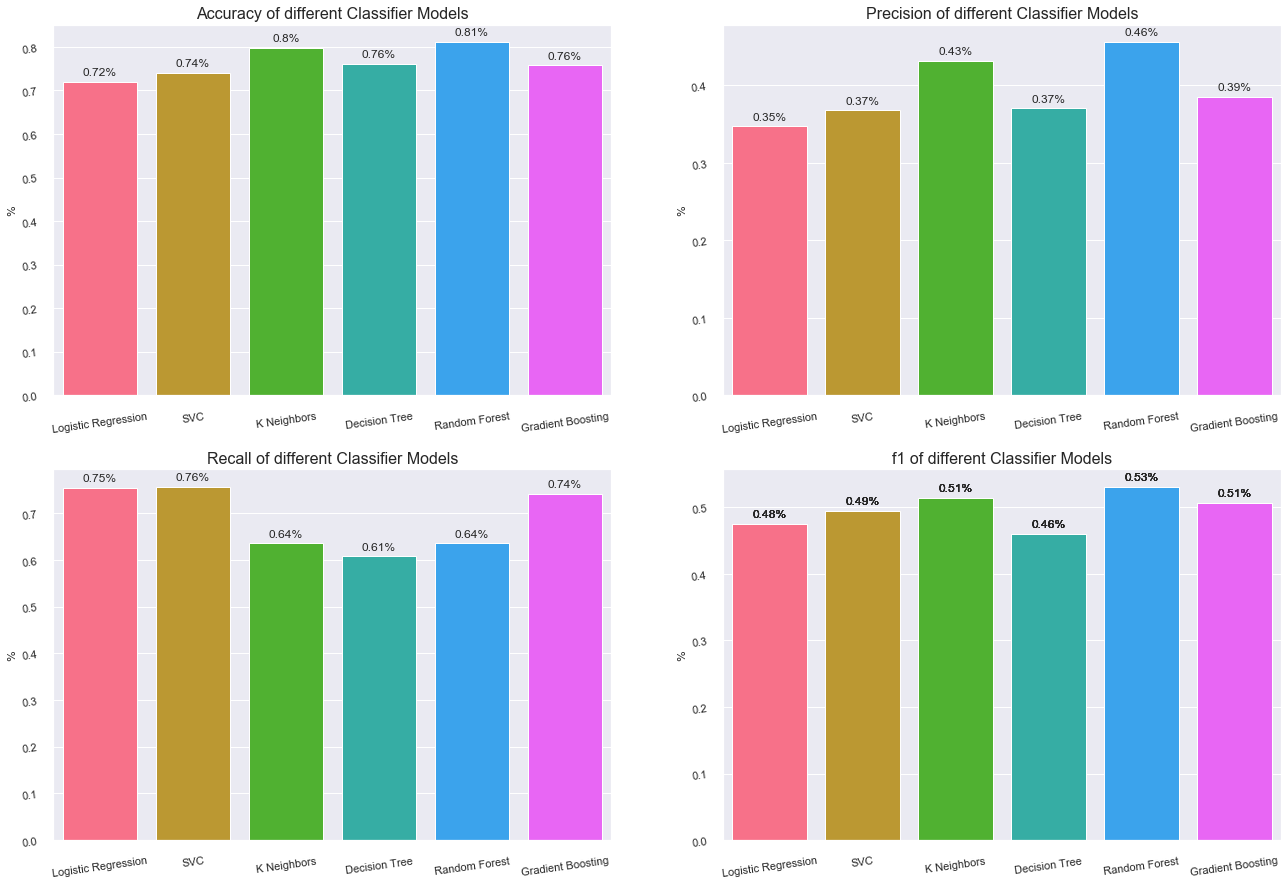

In [121]:
fig, ax = plt.subplots(2, 2, figsize=(22,15))

g1 = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0, ax=ax[0,0])
g1.set_title('Accuracy of different Classifier Models', fontsize = 16)
g1.set(xlabel=None)
g1.set(ylabel='%')
g1.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g1.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g1.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g2 = sns.barplot(x=models, y=precision_list, palette = "husl", saturation =2.0, ax=ax[0,1])
g2.set_title('Precision of different Classifier Models', fontsize = 16)
g2.set(xlabel=None)
g2.set(ylabel='%')
g2.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g2.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g2.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g3 = sns.barplot(x=models, y=recall_list, palette = "husl", saturation =2.0, ax=ax[1,0])
g3.set_title('Recall of different Classifier Models', fontsize = 16)
g3.set(xlabel=None)
g3.set(ylabel='%')
g3.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g3.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g3.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


    g4 = sns.barplot(x=models, y=f1_list, palette = "husl", saturation =2.0, ax=ax[1,1])
g4.set_title('f1 of different Classifier Models', fontsize = 16)
g4.set(xlabel=None)
g4.set(ylabel='%')
g4.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g4.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g4.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')

plt.show()

Olhando os resultados, algumas coisas chamam atenção:
- <p style='text-align: justify;'>Accuracy de todos os modelos apresentou uma redução. Apenas Random Forest e K-Neighbors foram maiores ou iguais a 80%. Aparentemente nossos modelos passaram a acertar menos, contudo...
- <p style='text-align: justify;'>Quando analisado do Recall comparado ao dataset original - olhando a variável default (que agora é 1), nossos modelos melhoraram consideravelmente. Todos os modelos tiveram Recall acima de 50% (No dataset original, nenhum ficou acima de 50%).
- <p style='text-align: justify;'>Contudo, a Precison dos modelos pioraram. Nenhum dos modelos, após o SMOTE, teve uma precisão acima de 50%. 
- f1 de todos os modelos melhorou.
- <p style='text-align: justify;'>Contudo, verificando a matriz de confusão podemos tirar as seguintes conclusões: 
1) O modelo passou a classificar mais default que o dataset sem tratamento - o que é importante no nosso caso, uma vez que para o banco, é de suma importância identificar esse default. Quando olhamos o Recall em relação ao default, nosso modelo tee uma melhora considerável, uma vez que recall nos dá a proporção de vezes que classificamos a variável em relação o quão verdade ela foi observada.
2) Macro avg teve uma melhora também, especial do Recall.

Os modelos selecionados para o GridSearchCV foram:
- Random Forest Classifier;
- Gradient Boosting Classifier;
- Logistic Regression;

In [122]:
parametros_rfc = {
    'n_estimators': [100, 300, 800],
    'max_depth': [5, 30],
    'min_samples_split': [1.0, 15, 100],
    'min_samples_leaf': [1, 5, 10] 
    }

parametros_gbc = {
    "learning_rate": [0.01, 0.025, 0.1],
    "min_samples_split": [0.1, 0.5, 2],
    "min_samples_leaf": [0.1, 0.5, 2],
    "max_depth":[2, 10, 15]
    }

parameters_lr = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "C": [0.1, 0.5, 1, 1.5, 3],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter":[100, 200, 300]
    }

In [123]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [124]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
lr = LogisticRegression()

In [125]:
rfc_ = escolhendo_melhores_parametros(rfc, parametros_rfc, scoring, X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [126]:
rfc_.fit(X_train, y_train)
predictions = rfc_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[9377 1847]
 [ 753 1522]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     11224
           1       0.45      0.67      0.54      2275

    accuracy                           0.81     13499
   macro avg       0.69      0.75      0.71     13499
weighted avg       0.85      0.81      0.82     13499



In [127]:
gbc_ = escolhendo_melhores_parametros(gbc, parametros_rfc, scoring, X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [128]:
gbc_.fit(X_train, y_train)
predictions = gbc_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[9546 1678]
 [ 839 1436]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     11224
           1       0.46      0.63      0.53      2275

    accuracy                           0.81     13499
   macro avg       0.69      0.74      0.71     13499
weighted avg       0.84      0.81      0.82     13499



In [129]:
lr_ = escolhendo_melhores_parametros(lr, parameters_lr, scoring, X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.73262195        nan 0.73212652 0.73210747
 0.73212652 0.73408918 0.73206936 0.73212652        nan        nan
        nan        nan        nan        nan        nan 0.73262195
        nan 0.73214558 0.73210747 0.73212652 0.73408918 0.73214558
 0.73212652        nan        nan        nan        nan        nan
        nan        nan 0.73262195        nan 0.73214558 0.73210747
 0.73210747 0.73408918 0.73212652 0.73212652        nan        nan
        nan        nan        nan        nan        nan 0.73212652
        nan 0.73206936 0.73214558 0.73214558 0.73239329 0.73212652
 0.73218369        nan        nan        nan        nan        nan
        nan        nan 0.73216463        nan 0.73210747 0.73214558
 0.73214558 0.73239329 0.73220274 0.73218369        nan        nan
        nan        nan        nan        nan        

In [130]:
lr_.fit(X_train, y_train)
predictions = lr_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[7999 3225]
 [ 554 1721]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81     11224
           1       0.35      0.76      0.48      2275

    accuracy                           0.72     13499
   macro avg       0.64      0.73      0.64     13499
weighted avg       0.84      0.72      0.75     13499



<p style='text-align: justify;'>Tanto Gradient Boosting Classifier quanto Random Forest Classifier tiveram resultados bem parecidos. Accuracy de ambos foi de 81%. Olhando a precisão, recall e f1 como macro avg praticamente ambos os modelos apresentaram o mesmo resultado. Verificando a matrix de confusão, as classifições foram bem semelhantes também.

<p style='text-align: justify;'>Logistic Regression teve uma accuracy menor, de 72%, mas o Recall em relação aos clientes que aplicaram o default foi o melhor dos três modelos. Isso ocorreu porque esse modelo classificou muitos mais indivíduos como maus pagadores que os demais.

# Near Miss:

Ao contrário do SMOT, Near Miss reduz o número de linhas, excluindo aquele que apareceu com maior frequência, no nosso caso, clientes que não deram default. O objetivo é verificar os resultados ao aplicar esse método em comparação aos demais, sem tretatmento e fazendo o SMOTE.

In [131]:
X = dados[manter]
y = dados[target]

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [133]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

0    0.833148
1    0.166852
Name: PAGO, dtype: float64
0    0.831469
1    0.168531
Name: PAGO, dtype: float64


In [134]:
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train)

In [135]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

1    0.5
0    0.5
Name: PAGO, dtype: float64
0    0.831469
1    0.168531
Name: PAGO, dtype: float64


In [136]:
models = ['Logistic Regression', 'SVC', 'K Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [137]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
conf = confusion_matrix(y_test, log_reg_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, log_reg_pred))
precision_list.append(precision_score(y_test, log_reg_pred))
recall_list.append(recall_score(y_test, log_reg_pred))
f1_list.append(f1_score(y_test, log_reg_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, log_reg_pred))

A Matriz de confusão foi:
[[5259 5965]
 [ 832 1443]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.86      0.47      0.61     11224
           1       0.19      0.63      0.30      2275

    accuracy                           0.50     13499
   macro avg       0.53      0.55      0.45     13499
weighted avg       0.75      0.50      0.56     13499



In [138]:
# svc
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
conf = confusion_matrix(y_test, sv_clf_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, sv_clf_pred))
precision_list.append(precision_score(y_test, sv_clf_pred))
recall_list.append(recall_score(y_test, sv_clf_pred))
f1_list.append(f1_score(y_test, sv_clf_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, sv_clf_pred))

A Matriz de confusão foi:
[[5624 5600]
 [ 819 1456]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.87      0.50      0.64     11224
           1       0.21      0.64      0.31      2275

    accuracy                           0.52     13499
   macro avg       0.54      0.57      0.47     13499
weighted avg       0.76      0.52      0.58     13499



In [139]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
conf = confusion_matrix(y_test, kn_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, kn_pred))
precision_list.append(precision_score(y_test, kn_pred))
recall_list.append(recall_score(y_test, kn_pred))
f1_list.append(f1_score(y_test, kn_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, kn_pred))

A Matriz de confusão foi:
[[5449 5775]
 [ 831 1444]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.87      0.49      0.62     11224
           1       0.20      0.63      0.30      2275

    accuracy                           0.51     13499
   macro avg       0.53      0.56      0.46     13499
weighted avg       0.76      0.51      0.57     13499



In [140]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
conf = confusion_matrix(y_test, dt_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, dt_pred))
precision_list.append(precision_score(y_test, dt_pred))
recall_list.append(recall_score(y_test, dt_pred))
f1_list.append(f1_score(y_test, dt_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, dt_pred))

A Matriz de confusão foi:
[[7233 3991]
 [ 710 1565]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     11224
           1       0.28      0.69      0.40      2275

    accuracy                           0.65     13499
   macro avg       0.60      0.67      0.58     13499
weighted avg       0.80      0.65      0.69     13499



In [141]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
conf = confusion_matrix(y_test, r_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, r_pred))
precision_list.append(precision_score(y_test, r_pred))
recall_list.append(recall_score(y_test, r_pred))
f1_list.append(f1_score(y_test, r_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, r_pred))

A Matriz de confusão foi:
[[3133 8091]
 [ 503 1772]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.86      0.28      0.42     11224
           1       0.18      0.78      0.29      2275

    accuracy                           0.36     13499
   macro avg       0.52      0.53      0.36     13499
weighted avg       0.75      0.36      0.40     13499



In [142]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier()
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
conf = confusion_matrix(y_test, gradientboost_pred)
medindo_metricas = metricas(conf)
accuracy_list.append(accuracy_score(y_test, gradientboost_pred))
precision_list.append(precision_score(y_test, gradientboost_pred))
recall_list.append(recall_score(y_test, gradientboost_pred))
f1_list.append(f1_score(y_test, gradientboost_pred))

print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, r_pred))

A Matriz de confusão foi:
[[5335 5889]
 [ 676 1599]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.86      0.28      0.42     11224
           1       0.18      0.78      0.29      2275

    accuracy                           0.36     13499
   macro avg       0.52      0.53      0.36     13499
weighted avg       0.75      0.36      0.40     13499



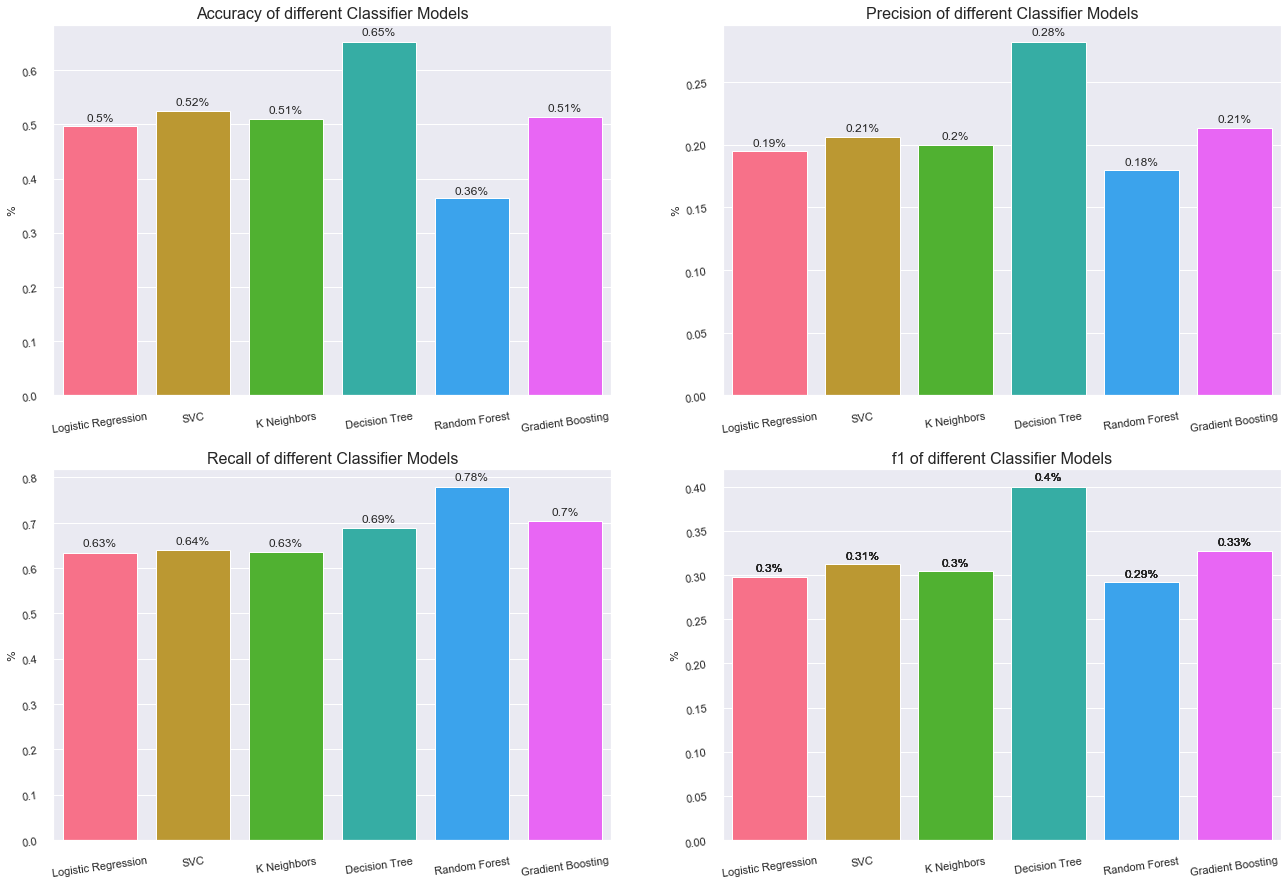

In [143]:
fig, ax = plt.subplots(2, 2, figsize=(22,15))

g1 = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0, ax=ax[0,0])
g1.set_title('Accuracy of different Classifier Models', fontsize = 16)
g1.set(xlabel=None)
g1.set(ylabel='%')
g1.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g1.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g1.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g2 = sns.barplot(x=models, y=precision_list, palette = "husl", saturation =2.0, ax=ax[0,1])
g2.set_title('Precision of different Classifier Models', fontsize = 16)
g2.set(xlabel=None)
g2.set(ylabel='%')
g2.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g2.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g2.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g3 = sns.barplot(x=models, y=recall_list, palette = "husl", saturation =2.0, ax=ax[1,0])
g3.set_title('Recall of different Classifier Models', fontsize = 16)
g3.set(xlabel=None)
g3.set(ylabel='%')
g3.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g3.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g3.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')


g4 = sns.barplot(x=models, y=f1_list, palette = "husl", saturation =2.0, ax=ax[1,1])
g4.set_title('f1 of different Classifier Models', fontsize = 16)
g4.set(xlabel=None)
g4.set(ylabel='%')
g4.tick_params(size = 12, labelbottom = 'center', rotation = 8)
for i in g4.patches:
    width, height = i.get_width(), i.get_height()
    text_x, text_y = i.get_xy() 
    g4.annotate(f'{round(height,2)}%', (text_x + width/2, text_y + height*1.02), ha='center', fontsize = 'medium')

plt.show()

- <p style='text-align: justify;'>Aplicando o Near Miss, Accuracy foi a menor em todos os modelos. Isso aconteceu porque a classificação como default cresceu bastante. Entre as técnicas aplicadas, essa foi a que teve mauior viés em classificar o cliente como possível mal pagador.
- <p style='text-align: justify;'>Apesar disso, foi a técnica em que os modelos tiveram melhores Recall. Em nenhum deles, o Recall foi inferior a 60%.
- <p style='text-align: justify;'>Precisão teve uma piora significativa. Nenhum modelo foi superior a 30%. Isso ocorreu porque o viés em classificar como mal pagador foi bem elevado.
- <p style='text-align: justify;'>f1 também registrou os piores resultados, apenas decision Tree foi igual a 40%, todos os outros modelos foram inferiores.

<p style='text-align: justify;'>A seguir, é aplicado GridSearchCV a três modelos, com o objetivo de verificar seus resultados e comparar as suas métricas. Esses modelos selecionados foram:

- Random Forest Classifier;
- Gradient Boosting Classifier;
- Decision Tree Classifier;

In [144]:
parametros_rfc = {
    'n_estimators': [100, 300, 800],
    'max_depth': [5, 30],
    'min_samples_split': [1.0, 15, 100],
    'min_samples_leaf': [1, 5, 10] 
    }

parametros_gbc = {
    "learning_rate": [0.01, 0.025, 0.1],
    "min_samples_split": [0.1, 0.5, 2],
    "min_samples_leaf": [0.1, 0.5, 2],
    "max_depth":[2, 10, 15]
    }

parametros_dtc = {
    "splitter":["best"],
    "max_depth" : [1, 3, 5, 10],
    "min_samples_leaf":[1, 3, 5, 10],
    "min_weight_fraction_leaf":[0.2, 0.5, 0.9],
    "max_features":["auto","log2"],
    "max_leaf_nodes":[10,30,40,90]
    }

In [145]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [146]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()

In [147]:
rfc_ = escolhendo_melhores_parametros(rfc, parametros_rfc, scoring, X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [148]:
rfc_.fit(X_train, y_train)
predictions = rfc_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[4027 7197]
 [ 513 1762]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.89      0.36      0.51     11224
           1       0.20      0.77      0.31      2275

    accuracy                           0.43     13499
   macro avg       0.54      0.57      0.41     13499
weighted avg       0.77      0.43      0.48     13499



In [149]:
gbc_ = escolhendo_melhores_parametros(gbc, parametros_gbc, scoring, X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [150]:
gbc_.fit(X_train, y_train)
predictions = gbc_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[4588 6636]
 [ 607 1668]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.88      0.41      0.56     11224
           1       0.20      0.73      0.32      2275

    accuracy                           0.46     13499
   macro avg       0.54      0.57      0.44     13499
weighted avg       0.77      0.46      0.52     13499



In [151]:
dtc_ = escolhendo_melhores_parametros(dtc, parametros_dtc, scoring, X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.59590866 0.5621313         nan 0.59628925 0.57002854        nan
 0.55242626 0.56508088        nan 0.60932445 0.56450999        nan
 0.59809705 0.54367269        nan 0.594196   0.57145576        nan
 0.56717412 0.52730733        nan 0.59676499 0.55623216        nan
 0.58848716 0.5302569         nan 0.58201713 0.55404377        nan
 0.58154139 0.53235014        nan 0.58401522 0.57202664        nan
 0.59990485 0.56346337        nan 0.59295909 0.5775452         nan
 0.60266413 0.5452902         nan 0.59714558 0.56964795        nan
 0.56565176 0.55337774        nan 0.60171265 0.57259753        nan
 0.56146527 0.57840152        nan 0.55737393 0.54205519        nan
 0.57231208 0.52331113        nan 0.56460514 0.58163654        nan
 0.58782112 0.53910561        nan 0.55727878 0.5905804         nan
 0.55404377 0.54738344        nan 0.54690771 0.54947

In [152]:
dtc_.fit(X_train, y_train)
predictions = dtc_.predict(X_test)
        
conf = confusion_matrix(y_test, predictions)
print('A Matriz de confusão foi:')
print(conf)

print('\nO report de classificação:')
print(classification_report(y_test, predictions))

A Matriz de confusão foi:
[[9027 2197]
 [1404  871]]

O report de classificação:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11224
           1       0.28      0.38      0.33      2275

    accuracy                           0.73     13499
   macro avg       0.57      0.59      0.58     13499
weighted avg       0.77      0.73      0.75     13499



<p style='text-align: justify;'>Avaliando os modelos, Decision Tree Classifier apresentou os resultados mais interessantes. Accuracy foi de 70% e as métricas de precisão (61%) e recall (64%) quando avaliadas como macro avg tiveram melhores resultados também.

<p style='text-align: justify;'>Os demais modelos, tiveram um viés bem elevado de classificação de maus pagadores, tanto que a precisão foi bem reduzida, ou seja, nosso modelo classificou muito mais os clientes como maus pagadores que os demais modelos.

<p style='text-align: justify;'>Avaliando nosso dataset, aquele que apresentou um resultado mais interessante em relação aos demais, foi o SMOTE, que multiplica as linhas que possui menor ocorrência, dado que nosso problema é de classificação. Claro que a contraparte disso é o custo computacional, uma vez que o dataset de treino pode ter muito mais linhas, contudo, analisando os resultados, foi aquele que apesentou os resultados mais interessantes. Comparado ao dataset original, quando aplicado a técnica SMOTE, a accuracy do modelo foi menor, contudo a "qualidade" dos acertos melhorou, uma vez que foi possível identificar bem mais clientes que aplicaram default. Já o método NEAR MISS enviesou muito a classificação de default.